***Шаг 1. Описание проекта.***<br><br>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>

Описание данных games.csv<br>
•	Name — название игры<br>
•	Platform — платформа<br>
•	Year_of_Release — год выпуска<br>
•	Genre — жанр игры<br>
•	NA_sales — продажи в Северной Америке (миллионы долларов)<br>
•	EU_sales — продажи в Европе (миллионы долларов)<br>
•	JP_sales — продажи в Японии (миллионы долларов)<br>
•	Other_sales — продажи в других странах (миллионы долларов)<br>
•	Critic_Score — оценка критиков (от 0 до 100)<br>
•	User_Score — оценка пользователей (от 0 до 10)<br>
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>
<br>Данные за 2016 год могут быть неполными.<br>

***Цель: Выявить закономерности определяющие успешность игры*** 


***Шаг 2. Откройте файл с данными и изучите общую информацию.***

Подключим библиотеку Pandas и прочитаем файл csv с помощью read_csv

In [1]:
import pandas as pd                      #Импорт библиотеки Pandas              

df = pd.read_csv('/datasets/games.csv') #Чтение файла csv

df.info()                               #Получим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

Name               16713 non-null object

Platform           16715 non-null object

Year_of_Release    16446 non-null float64

Genre              16713 non-null object

NA_sales           16715 non-null float64

EU_sales           16715 non-null float64

JP_sales           16715 non-null float64

Other_sales        16715 non-null float64

Critic_Score       8137 non-null float64

User_Score         10014 non-null object

Rating             9949 non-null object

dtypes: float64(6), object(5)

memory usage: 1.4+ MB


**Вывод: Некоторые столбцы датасета меют пропущенные значения (Name, Year_of_Release, Genre, 
Critic_Score, User_Score, Rating), столбец User_Score имеет тип данных object.**



***Шаг 3. Подготовьте данные.***

- *Замените названия столбцов (приведите к нижнему регистру);*

Для приведения названий столбцов к нижнему регистру воспользуемся методом columns, который выводит список названий столбцов датасета и функцией Python - map, которая применят указанную в ней функцию (str.lower - приведение к нижнему регистру) к элементам итерируемого объекта (нашего списка названий стобцов df.columns).

In [2]:
df.columns = map(str.lower, df.columns) #Итеративно применяем функцию str.lower к каждому элементу списка df.columns
df.head(5)                              #Выведем первые 5 строк для проверки результата

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- *Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;*
Исходя из общей информации о датасете нам нужно изменить тип данных User_Score с object на float64, чтобы иметь возможность производить над ним математические операции.
Воспользуемся функцией to_numeric c флагом errors ='coerce', чтобы некорректные значения принудительно заменились  на NaN для обоих столбцов.

In [3]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') #coerce - замена некоректных значений на NaN;
df.info()                                                           #Выводим информация о датасете
df.head(5)

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

name               16713 non-null object

platform           16715 non-null object

year_of_release    16446 non-null float64

genre              16713 non-null object

na_sales           16715 non-null float64

eu_sales           16715 non-null float64

jp_sales           16715 non-null float64

other_sales        16715 non-null float64

critic_score       8137 non-null float64

user_score         7590 non-null float64

rating             9949 non-null object

dtypes: float64(7), object(4)

memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Помимо пропусков в столбце user_score были некоректные значения. После применения функции to_numeric с заменой некоректных занчений на NaN кол-во не нулевых объектов снизилось с 10014 non-null object до 7590 non-null float64.

Обработайте пропуски при необходимости:

- *Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;*
    
На данном этапе предлагаю удалить игры, которые не имеют имени жанра (genre) - т.к. при последующем анализе эти игры будут представлять отдельную неопределенную категорию, а так как их всего 2 (две) и их принадлежность неопределена то их анализ не будет отражать никаких закономерностей генеральной совокупности игр этого (неопределенного жанра).

С другой стороны при наличии названий у этих 2 (двух) игр в реальной ситуации можно было бы найти их жанр и проблем в их дальнейшем использовании не было бы. Однако в датасете также присутствуют 2 (две) игры у которых тажке нет имени, с большой вероятностью это теже самые игры.

Итак мы будем удалять игры с отсутствующими данным о жанре (genre) с помощью метода dropna()

In [4]:
df.dropna(subset = ['genre'], inplace = True) #Удаление в исходном датасете, а не создание его копии inplace = True
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 16713 entries, 0 to 16714

Data columns (total 11 columns):

name               16713 non-null object

platform           16713 non-null object

year_of_release    16444 non-null float64

genre              16713 non-null object

na_sales           16713 non-null float64

eu_sales           16713 non-null float64

jp_sales           16713 non-null float64

other_sales        16713 non-null float64

critic_score       8137 non-null float64

user_score         7590 non-null float64

rating             9949 non-null object

dtypes: float64(7), object(4)

memory usage: 1.5+ MB


Данные об играх без названия жанра (genre) удалены, количество строк датасета уменьшилось на 2 (две). Однако, количество игр без имени (name) осталось прежним, следовательно это были разные игры.

Столбец year_of_release содержит 269 пропущенных знаений, что составляет 1,61% от общего числа данных и не будет оказывать существенное влиянияна результаты анализа, поэтому для отсутствия проблем при дальнешей группировке и манипуляциях с годом выпуска удалим и их.

In [5]:
df.dropna(subset = ['year_of_release'], inplace = True) #Удаление в исходном датасете, а не создание его копии inplace = True
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 16444 entries, 0 to 16714

Data columns (total 11 columns):

name               16444 non-null object

platform           16444 non-null object

year_of_release    16444 non-null float64

genre              16444 non-null object

na_sales           16444 non-null float64

eu_sales           16444 non-null float64

jp_sales           16444 non-null float64

other_sales        16444 non-null float64

critic_score       7983 non-null float64

user_score         7463 non-null float64

rating             9768 non-null object

dtypes: float64(7), object(4)

memory usage: 1.5+ MB


Строки с пропущенным year_of_release удалены, датасет стал более менее стройным.

На данном этапе удалять строки с неопределенными critic_score, user_score и rating или заполнять их средними или медаианой НЕ БУДЕМ. При удалении объем датасета уменьшится в двое и строки не имеющие этих значений, но имеющие другие значения, позволяют анализировать успешность игр (жанра) по величине продаж. Заполнить средним и медианой при необходимости можно позже.

- *Опишите причины, которые могли привести к пропускам;*

К пропускам в данных могли привести ошибки операторов при внесении информации, сбои в работе оборудования, отсутствие этих данных, например, отсутствие статистики рейтингов для старых игр (она могла не собираться), утеря данных при различных обстоятельствах, а также различие данных по одной и той же игре в разных источниках и невозможностью их верификации.


- *Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.*

Строк с рейтингом 'tbd' (To Be Determined - "Будет определено) в таблице не найдено.
Искал выраженим df.loc[df.loc[:, 'rating'] == 'tbd']

Для понимания всех видов возрастных рейтингов представленных в датасете выведем все уникальные значения столбца rating

In [6]:
df['rating'].unique() #Выводит список уникальных значений столбца rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Значения:

'E' - («Everyone») — «Для всех»<br>
 nan - пропуск данных <br>
'M' - («Mature») — «От 17 лет»<br>
'T' - («Teen») — «Подросткам 13—19 лет»<br>
'E10+' - («Everyone 10 and older») — «Для всех старше 10 лет»<br>
'K-A' - ("K-A for Kids to Adults") - устаревшее обозначение рейтинга "Е"<br>
'AO' -(«Adults Only 18+») — «Только для взрослых»<br>
'EC' - («Early childhood») — «Для детей младшего возраста»<br>
'RP' - («Rating Pending»») — «Рейтинг ожидается». Аналог 'tbd' (To Be Determined - "Будет определено) <br>

Анализ категорий показывает необходимось след. операции:
1. 'K-A' на 'E' - устаревшее на новое
2. 'RP' на 'E' - т.к. разрешено, то что не запрещено - эти игры уже имеют продажи несмотря на отсутствие рейтинга и поэтому на данный момент продаются всем
3. Проверить количество игр с пропущенным возрастным рейтингом

In [7]:
df['rating'] = df['rating'].replace('K-A', 'E') #Заменим 'K-A' на 'E'
df['rating'].unique() #Выводит список уникальных значений столбца rating

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Замена 'K-A' на 'E' произведена

In [8]:
df['rating'] = df['rating'].replace('RP', 'E') #Заменим 'RP' на 'E'
df['rating'].unique() #Выводит список уникальных значений столбца rating

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

Замена 'RP' на 'E' произведена

Найдем количество игр с неопределенным рейтингом

In [9]:
df['rating'].isnull().sum() #Количество игр с неопределенным рейтингом

6676

Игрс с неизвестным рейтингом 6676. Это большой объем данных и просто удалить их нельзя.


Проверим года выпуска игр с неопределенным рейтингом. Предположим, что старые игры (до 2000х) не имееют рейтинга, в связи с отсутствием законодательства на тот момент, что позволит присвоить им рейтинг 'E'.

In [10]:
df['year_of_release'].loc[df['rating'].isnull()].unique()

array([1985., 1996., 1989., 1984., 2005., 1999., 1990., 2006., 1988.,
       2002., 2010., 1998., 2015., 2013., 2009., 2014., 1992., 1993.,
       2004., 1994., 1997., 2012., 2007., 1982., 2016., 2003., 2011.,
       1986., 2000., 2001., 1995., 2008., 1991., 1981., 1987., 1980.,
       1983.])

Предположение не подтвердилось. Среди игр есть игры 2005, 2006, 2008,2010,2012,2013,2014,2015, 2016 и 2018 годов выпуска.
К тому же в различных странах возрастные ограничения на одну и ту же игру могут быть различны, отсюда следует, что столбец возрастной рейтинг при наличии данных продаж по разным страннам в принципе не корректен, т.к. возможны значительные различия в реальном рейтинге между США, Японией, ЕС и другими странами.

Обоснованно присвоить рейтинг 'E' можно только старым играм до определенного года, но определить год без изучения истории рейтинга игр не представляется возможным.

Итак, на данный момент оставить строки с NaN в стобце rating в покое


- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Создадим столбец total_sales, содержащий суммарные продажи каждой игры по всем регионам: na_sales, eu_sales, jp_sales, other_sales.

In [11]:
df['total_sales'] =  df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 

#Приведем тип данных в столбце year_of_release к int
df['year_of_release'] = df['year_of_release'].astype('int')

df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Дополнительно проверим/удалим из данных стобца name дубликаты (при наличии) и выведем данные о датасете

In [12]:
df['name'].drop_duplicates().reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 16444 entries, 0 to 16714

Data columns (total 12 columns):

name               16444 non-null object

platform           16444 non-null object

year_of_release    16444 non-null int64

genre              16444 non-null object

na_sales           16444 non-null float64

eu_sales           16444 non-null float64

jp_sales           16444 non-null float64

other_sales        16444 non-null float64

critic_score       7983 non-null float64

user_score         7463 non-null float64

rating             9768 non-null object

total_sales        16444 non-null float64

dtypes: float64(7), int64(1), object(4)

memory usage: 1.6+ MB


Дубликатов игр в датасете не оказалось.

**Вывод: Данные подготовлены для дальнейшей работы.** <br>**- Названия столбцов приведены к нижнему регистру.** <br> **- Данные столбцов critic_score и user_score приведены с типу float64.**<br> **- Пропущенные значения, которые могут повлиять на результаты анализа заполнены или удалены.**<br> **- Добавлен новый столбец total_sales, содержащий сумму продаж во всех регионах**<br> **- Обработаны устаревшие данные возрастного рейтинга ESRB**<br>  

***Шаг 4. Проведите исследовательский анализ данных***
- *Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?*

Для этого создадим сводную таблицу с группировкой по годам и подсчитаем количество выпущенных (проданных игр)

In [13]:
pd.pivot_table(
    df, 
    index='year_of_release', 
    values='total_sales', 
    aggfunc='count').rename(columns = {'total_sales':'total_games'})


,total_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Изображим данные в виде диаграммы

Text(0, 0.5, 'quantity')

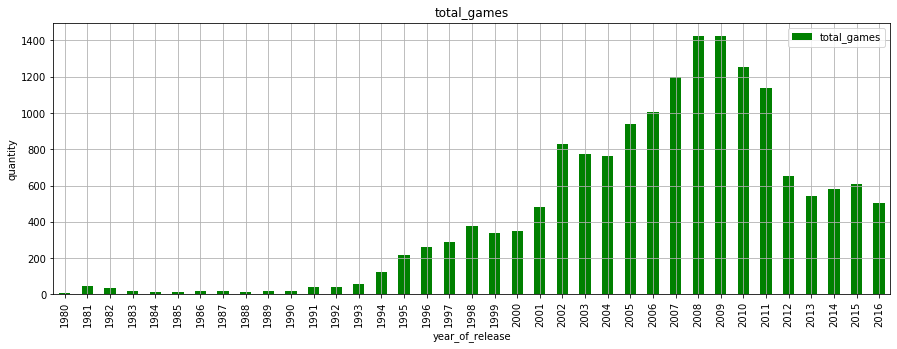

In [14]:
import matplotlib.pyplot as plt

pd.pivot_table(
    df, 
    index='year_of_release', 
    values='total_sales', 
    aggfunc='count').rename(columns = {'total_sales':'total_games'}).plot(kind='bar',figsize=(15,5), color='green', grid=True)

plt.title('total_games')
plt.ylabel('quantity')

До 1993 года включительно в год выходило менее 100 игр.

Расцвет индустрии пришелся на период с 1994 по 2011 год - практически ежегодный рост количества выпускаемых игр. Это можно объяснить относительной молодостью рынка видеоигр и неискушенностью потребителе, которые сметали с прилавков практически что угодно, с чем и был связано рассцвет индустрии и выпуска множества игр, порой сомнительного качества.

С 2012 по 2016 год количество выпускаемых игр упало в 2 (два) раза от наиболее успешних предыдущих лет. 



**По моему мнению данные до 1993 г. можно исключить из выборки, т.к. за это время индустрия значительно изменилась и игры одного и того же жанра до 93 и после 93 не сравнимы. Дополнительно к этому в те года охват играми населения был незначителен и поэтому эти данные будут не репрезентативны для настоящего времени. Однако, новое это хорошо забытое старое и при поиске новых идей, забытых жанров, механик и т.д. возможно провести анализ успеха старых игр и простестировать то что имело успех тогда на новой массовой аудитории**


**Итак в зависимости от стоящей задачи в одном случае я бы удалил данные до 1993 года, в другом присмотрелся к ним внимательнее**

 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?
 
 
 Выведем список всех платформ.

In [15]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Выведем платформы с суммарными продажами за все года и сортировкой по убыванию

In [16]:
top_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

print(top_platform)

          total_sales

platform             

PS2           1233.56

X360           961.24

PS3            931.34

Wii            891.18

DS             802.78

PS             727.58

PS4            314.14

GBA            312.88

PSP            289.53

3DS            257.81

PC             255.76

GB             254.43

XB             251.57

NES            251.05

N64            218.01

SNES           200.04

GC             196.73

XOne           159.32

2600            86.48

WiiU            82.19

PSV             53.81

SAT             33.59

GEN             28.35

DC              15.95

SCD              1.86

NG               1.44

WS               1.42

TG16             0.16

3DO              0.10

GG               0.04

PCFX             0.03


Построим графики продаж по годам для всех платформ и проанализируем их.

In [17]:
top_platform_name = top_platform.index.unique() #Создали список с именами из топа платформ
top_platform_name

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG',
       'PCFX'],
      dtype='object', name='platform')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

  fig = self.plt.figure(figsize=self.figsize)


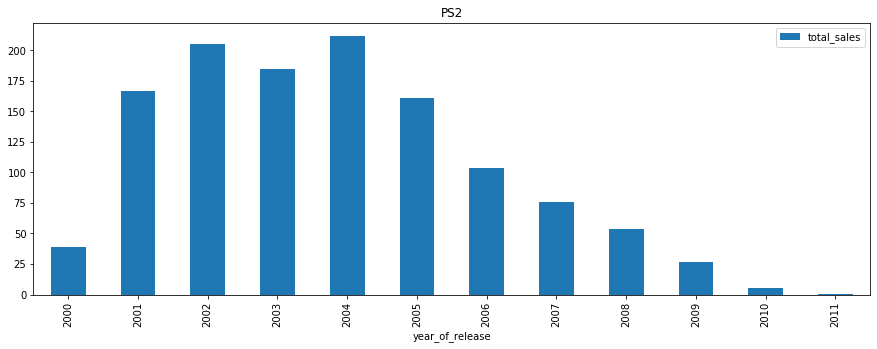

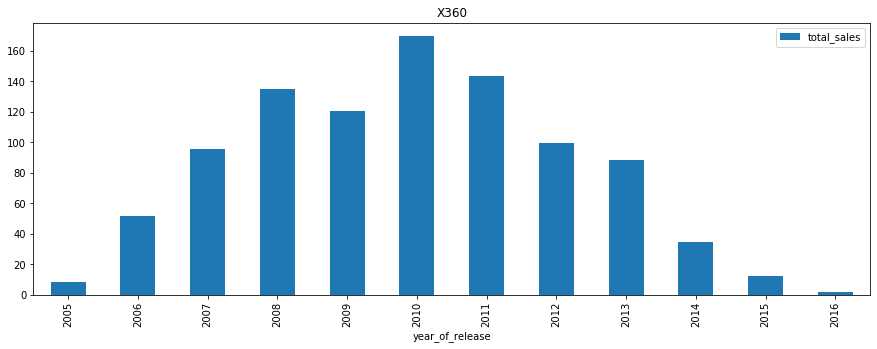

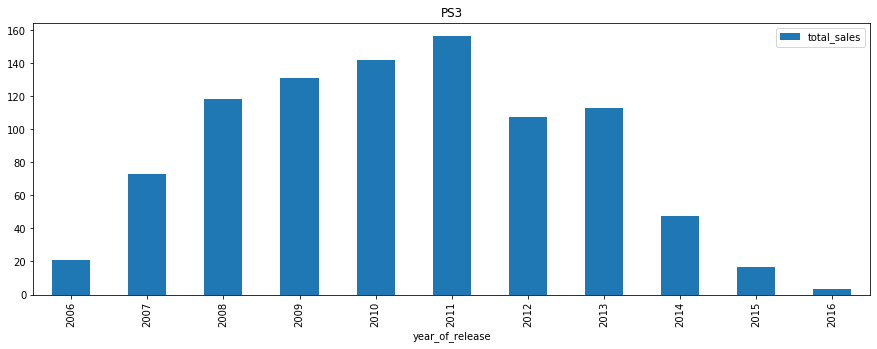

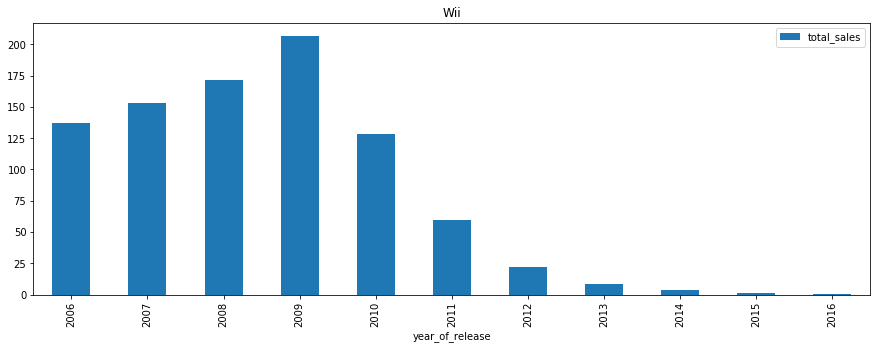

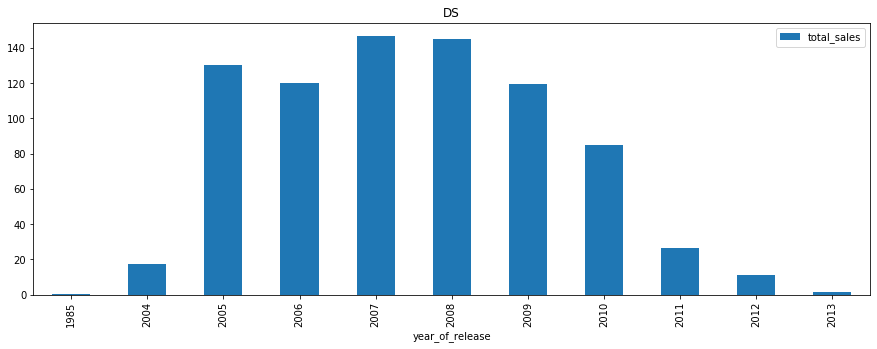

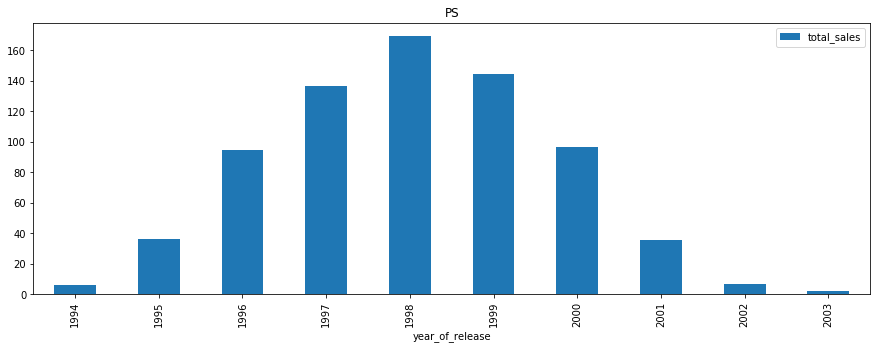

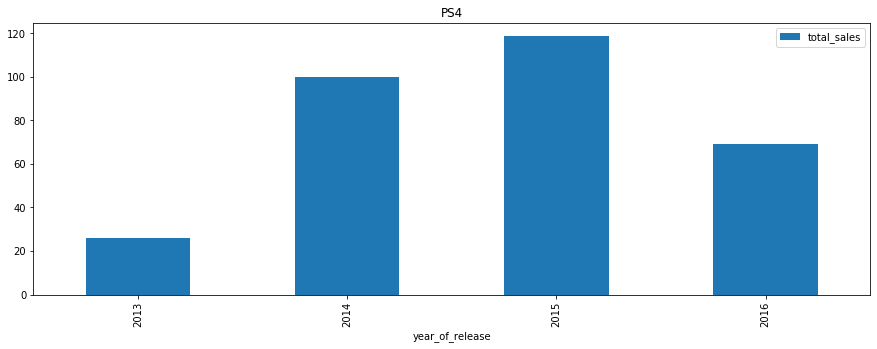

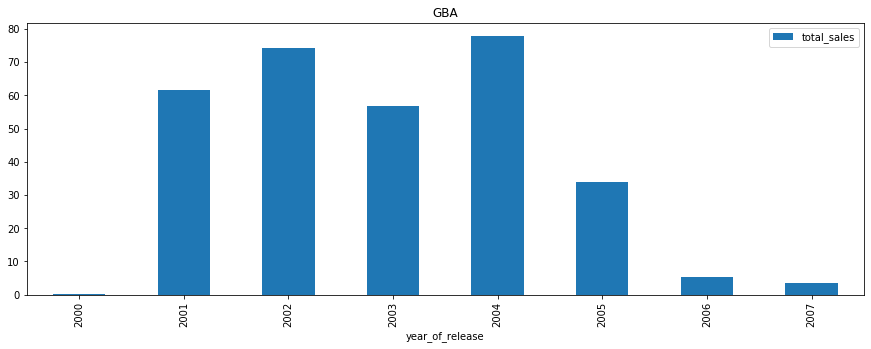

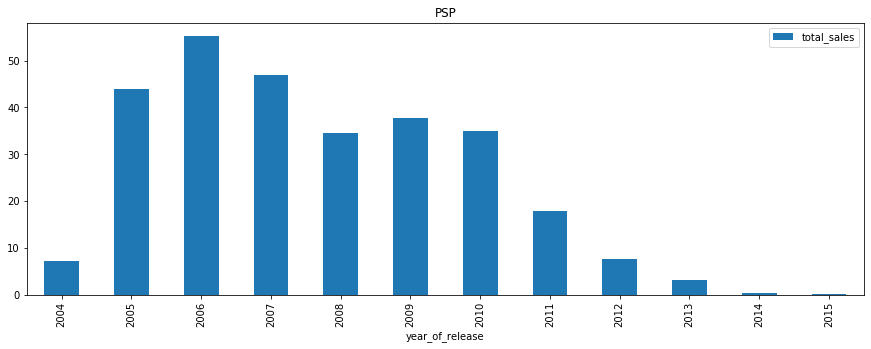

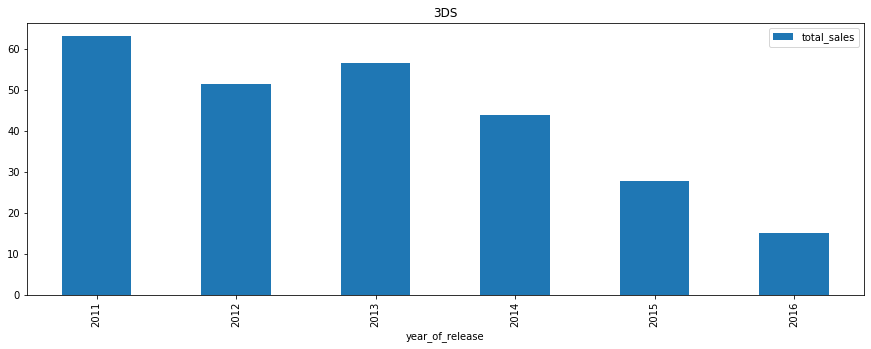

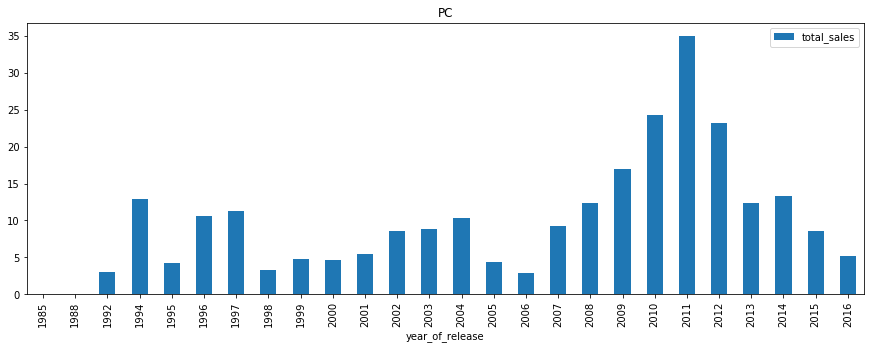

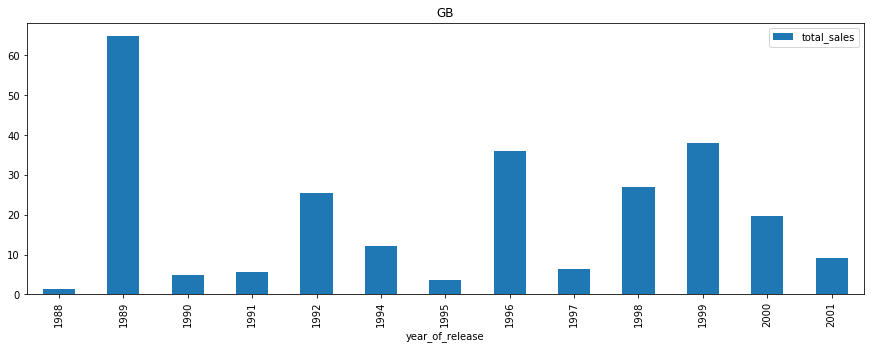

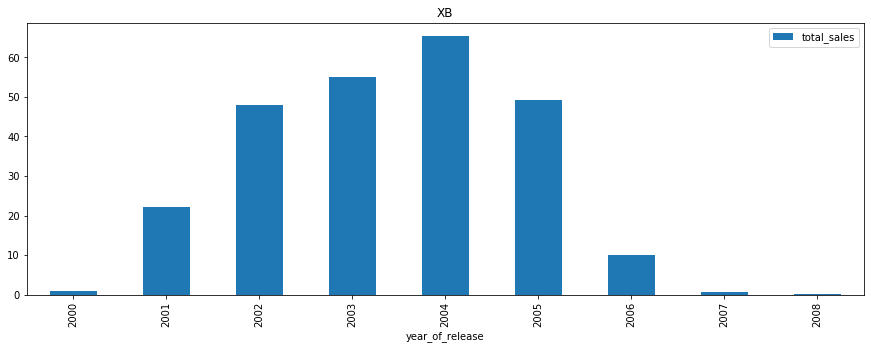

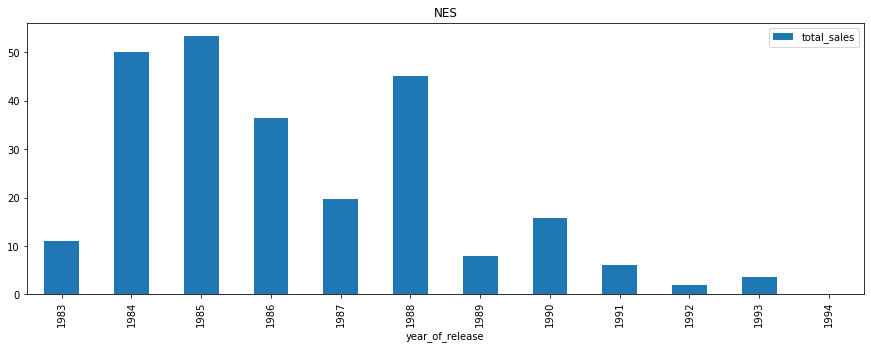

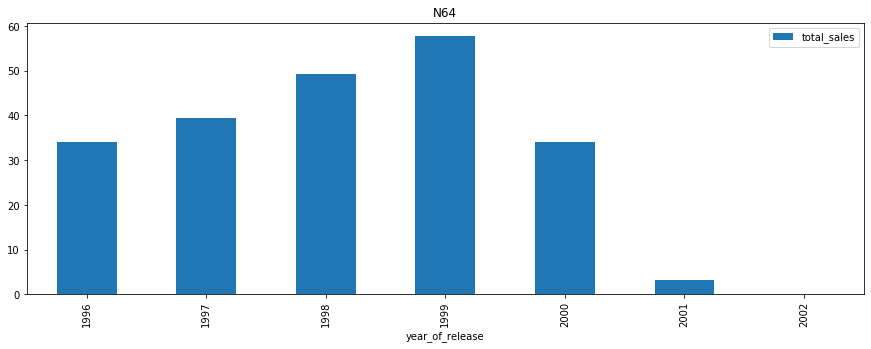

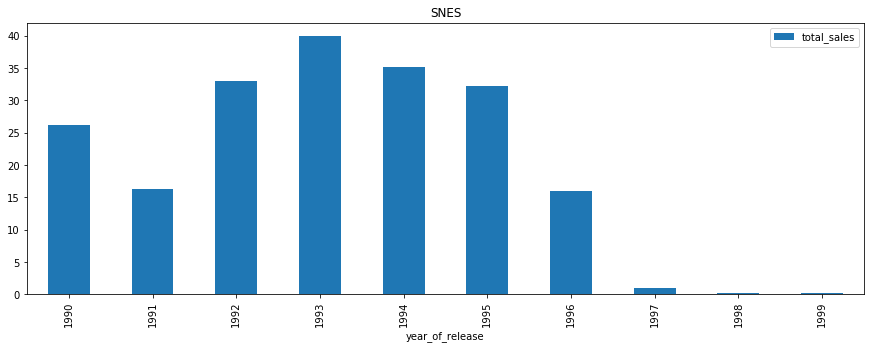

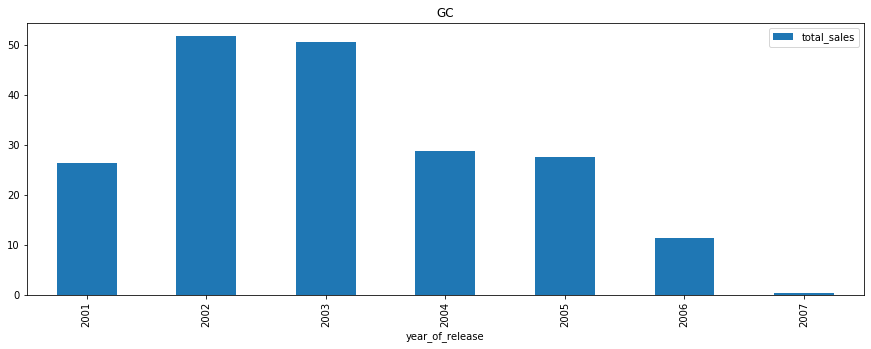

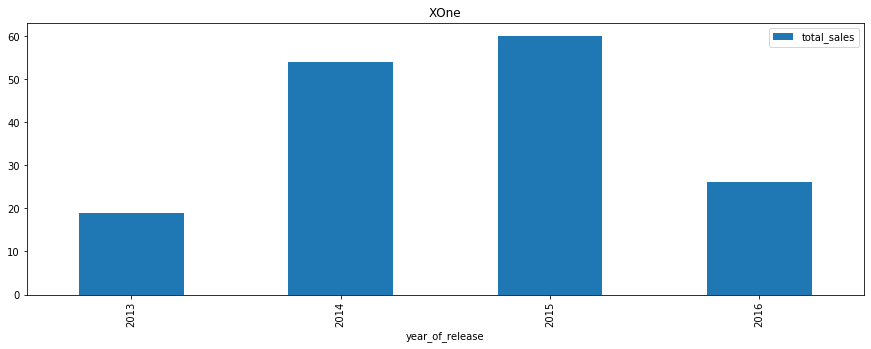

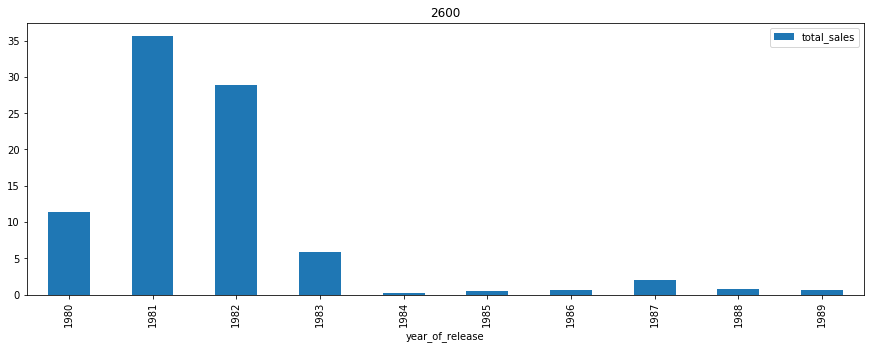

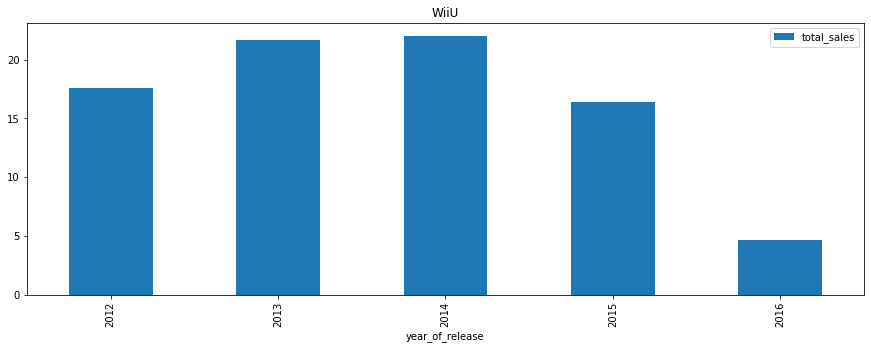

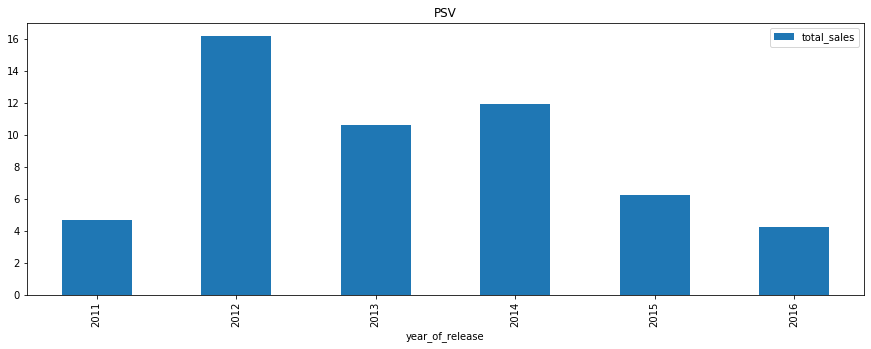

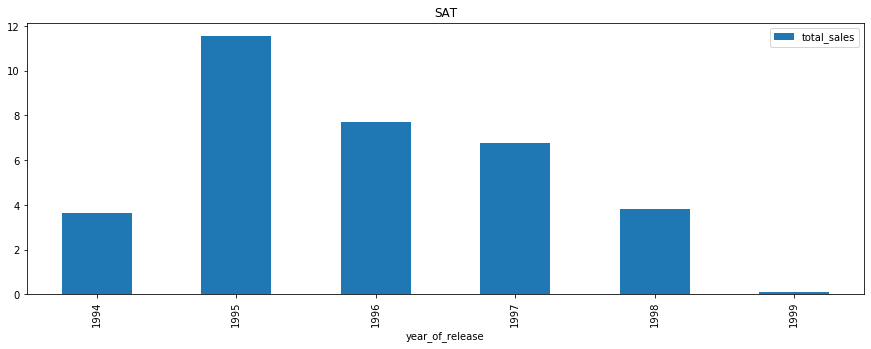

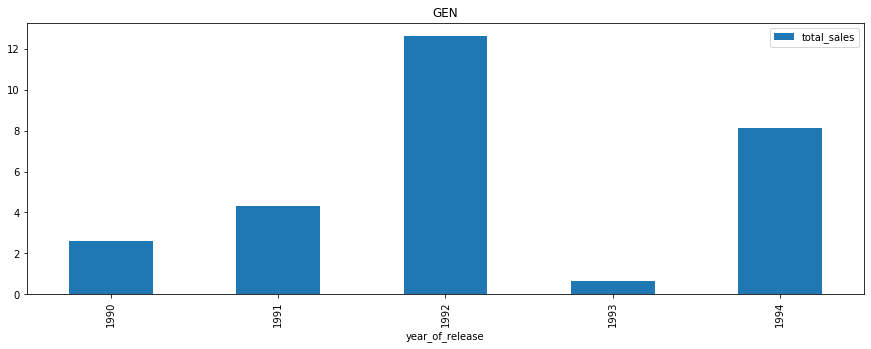

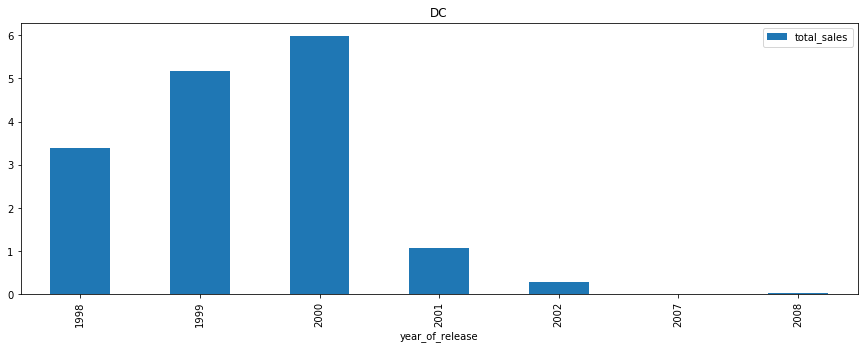

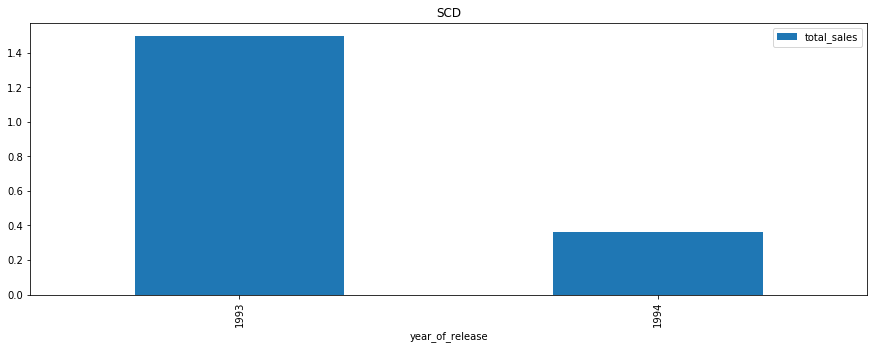

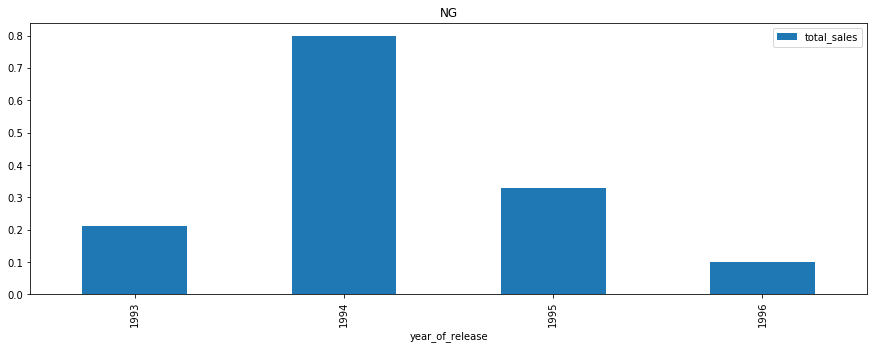

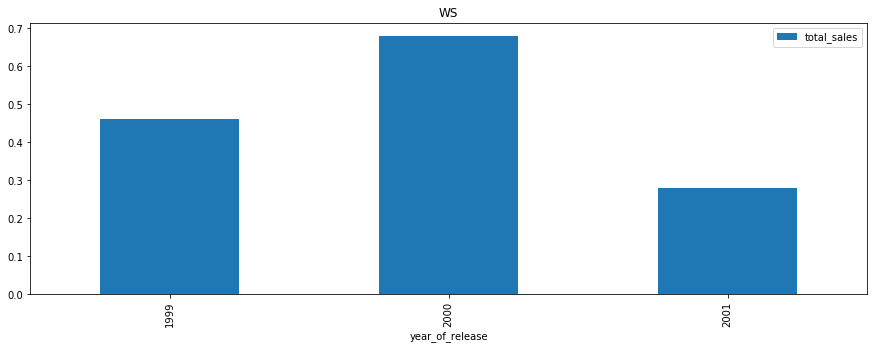

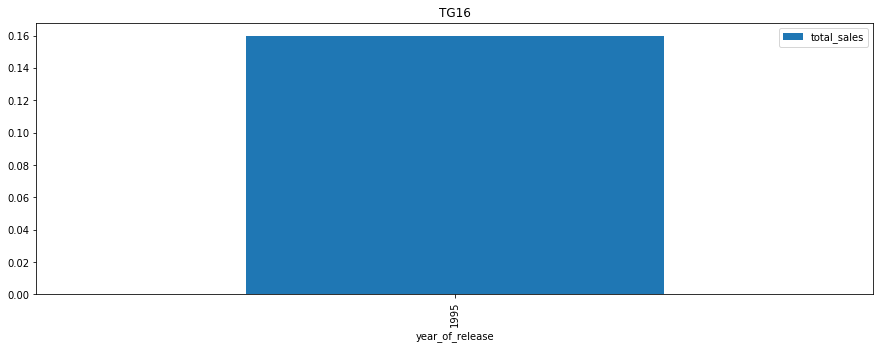

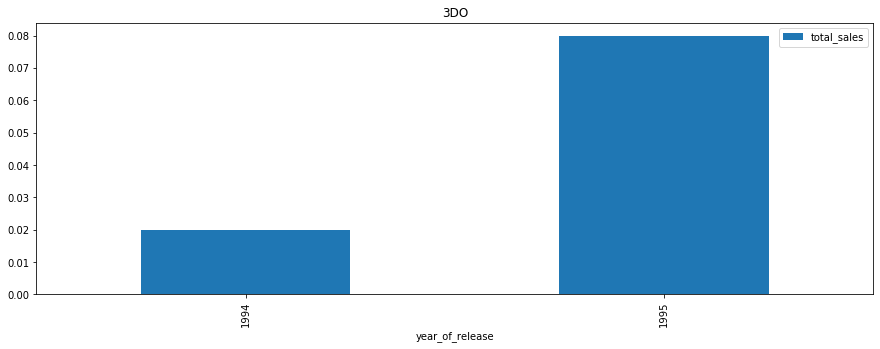

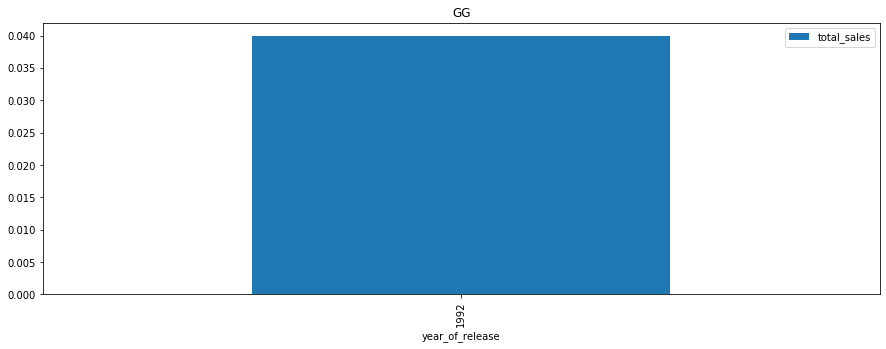

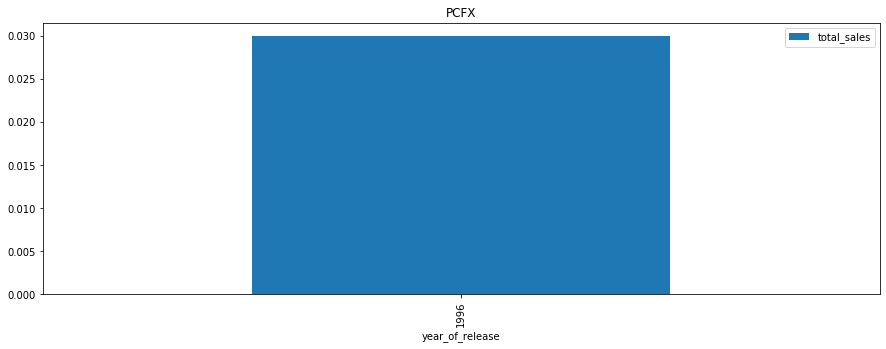

In [18]:
import matplotlib.pyplot as plt

for platform in top_platform_name:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)

Помня, что мы имеем не полные данные за 2016 год, будем считать "имершими" платформы не имеющие продаж за 2015 год и ранее, а также платформы имеющие очень маленькие продажи за эти года.


**Платформы не имеющие продаж в 2016 году и ранее:**

*PS2, Wii, DS, PS, GBA, PSP (скорее мертв, чем жив), GB, XB, NES, N64, SNES, GC, 2600, SAT, GEN, DC, SCD, NG, WS, TG16, 3DO, GG, PCFX

**Платформы имеющие продажи в последние годы и в 2016 году:**

*X360 (умирающая), PS3 (умирающая), Wii(в терминальной стадии), PS4(в норме), 3DS(на спаде), PC (на спаде, но платформа циклична), XOne (в норме), WiiU(на спаде), PSV (на спаде)


**Распределение продаж на диаграмах показывает, что в среднем большиство платформ проходит цикл взлета и падения за 10 лет. 
Это может быть связано с технологическим устареванием платформ и(или) с выходом на рынок конкурентов.**


С учетом среднего срока жизни платформ в дальнейшем анализе предлагаю учитывать данные только за последние 10 лет, т.е. с 2006 г. по 2016 годы и только для следующих платформ: X360 (умирающая), PS3 (умирающая), PS4(в норме), 3DS(на спаде), PC (на спаде, но платформа циклична), XOne (в норме), WiiU(на спаде), PSV (на спаде)


- Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.


**Для исключения искажения данных, связанное с неполнотой информации за 2016 год, предлагаю в дальнейшем анализе использовать данные с 2014 по 2015 год.**

•	Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.



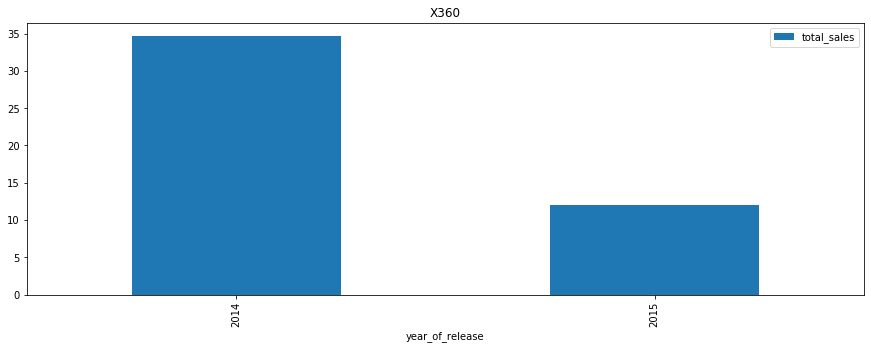

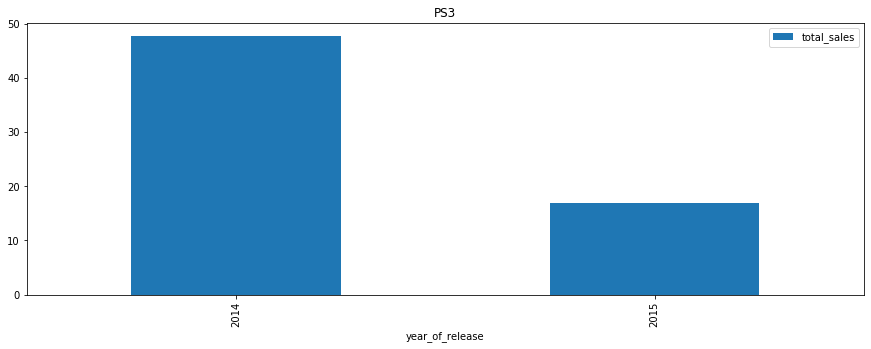

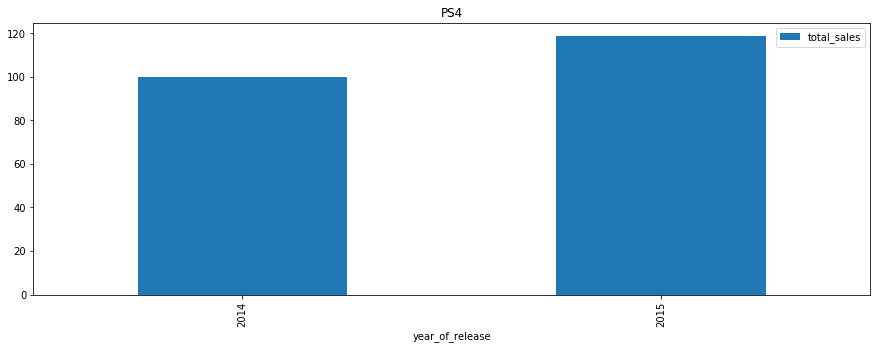

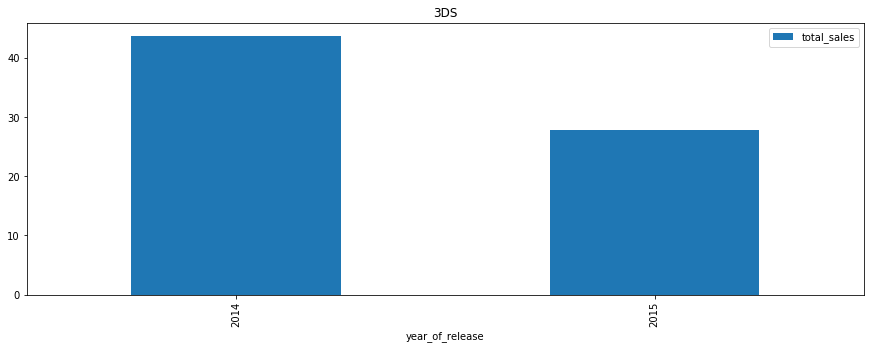

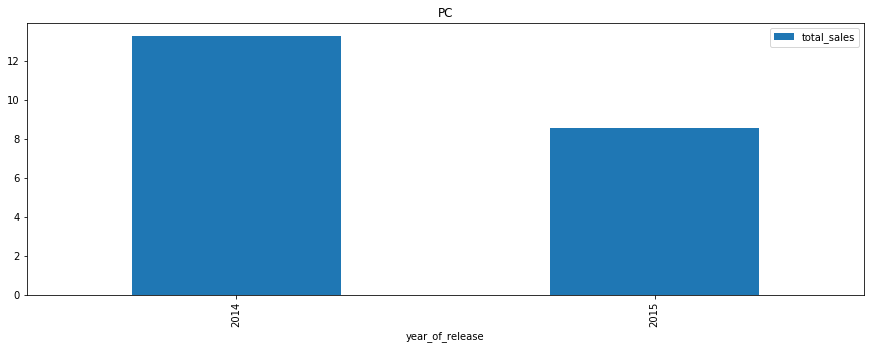

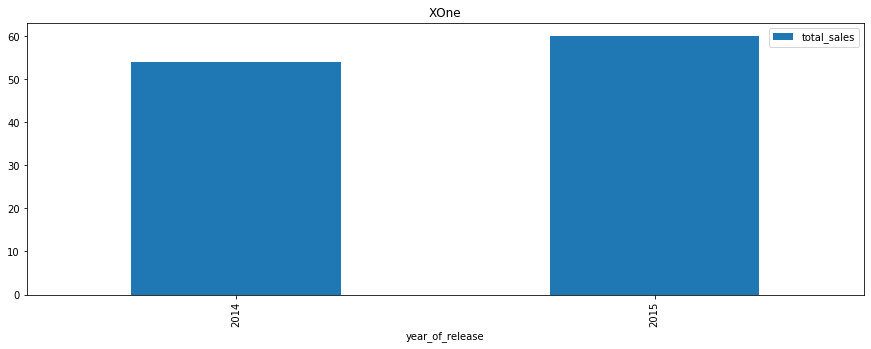

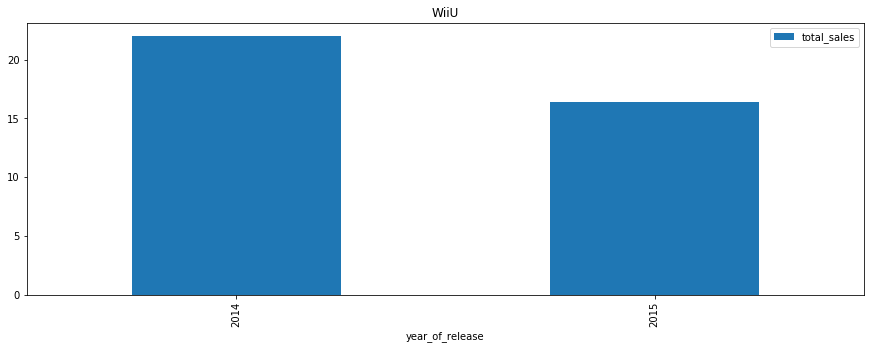

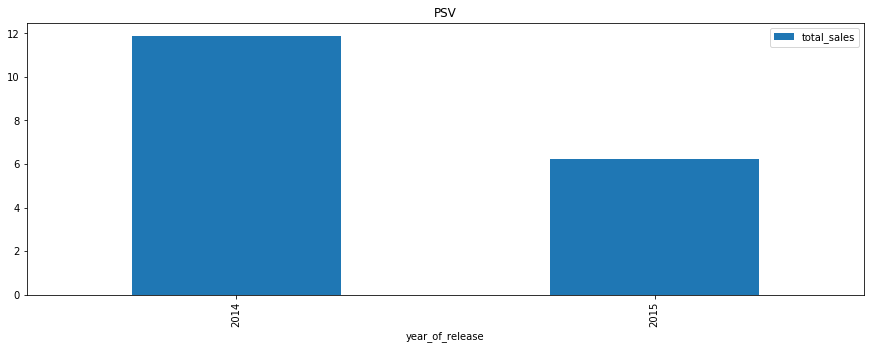

In [19]:
import matplotlib.pyplot as plt

#Отобранные платформы для дальнейшего анализа с 2003 по 2015 годы
selected_platform = ['X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV'] 

#Сделаем срез данных по года с 2014 до 2015
df.query(' 2016 > year_of_release >= 2014', inplace=True)

for platform in selected_platform:
    df[df['platform'] == platform].pivot_table(
        index='year_of_release', 
        values='total_sales', 
        aggfunc='sum').plot(kind='bar', figsize=(15,5))
    
    plt.title(platform)

Х360 – находится на спаде и не походит на роль перспективной, снижение за 2014 и 2015 годы более чем в 2 раза в сравнении с предыдущим периодом, однако сммарные продажи еще составляют более 10 млн. и платформу еще можно поддерживать пару лет.

PS3 – находится на спаде и не походит на роль перспективной, снижение за 2014 и 2015 годы более чем в 2 раза в сравнении с предыдущим периодом.

PS4 – демонстрирует уверенный рост, выбираем в качестве перспективной платформы. (В 2016 году PS5 еще не вышла).

3DS – находится на спаде, но продажи за последние два года еще на достаточном уровне для продолжения выпуска новых игр.

PC – находится на спаде, но по анализу графику за весь период наблюдений можно сказать что успех платформы цикличен во времени, платформа является перспективной.

XOne – перспективная платформа, демонстрирует уверенный рост.

WiiU – перспективная платформа, продажи 2015 год незначительно снизились.

PSV – находится на спаде, падение продаж в 2015 году почти в 2 раза, продажи составляют менее 10 млн, но платформу еще можно поддерживать пару лет.


**Выбранные потенциально прибильные платформы: PS4, PC, XOne, WiiU, PSV, 3DS, Х360**





In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


- *Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.*

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

  return array(a, dtype, copy=False, order=order)


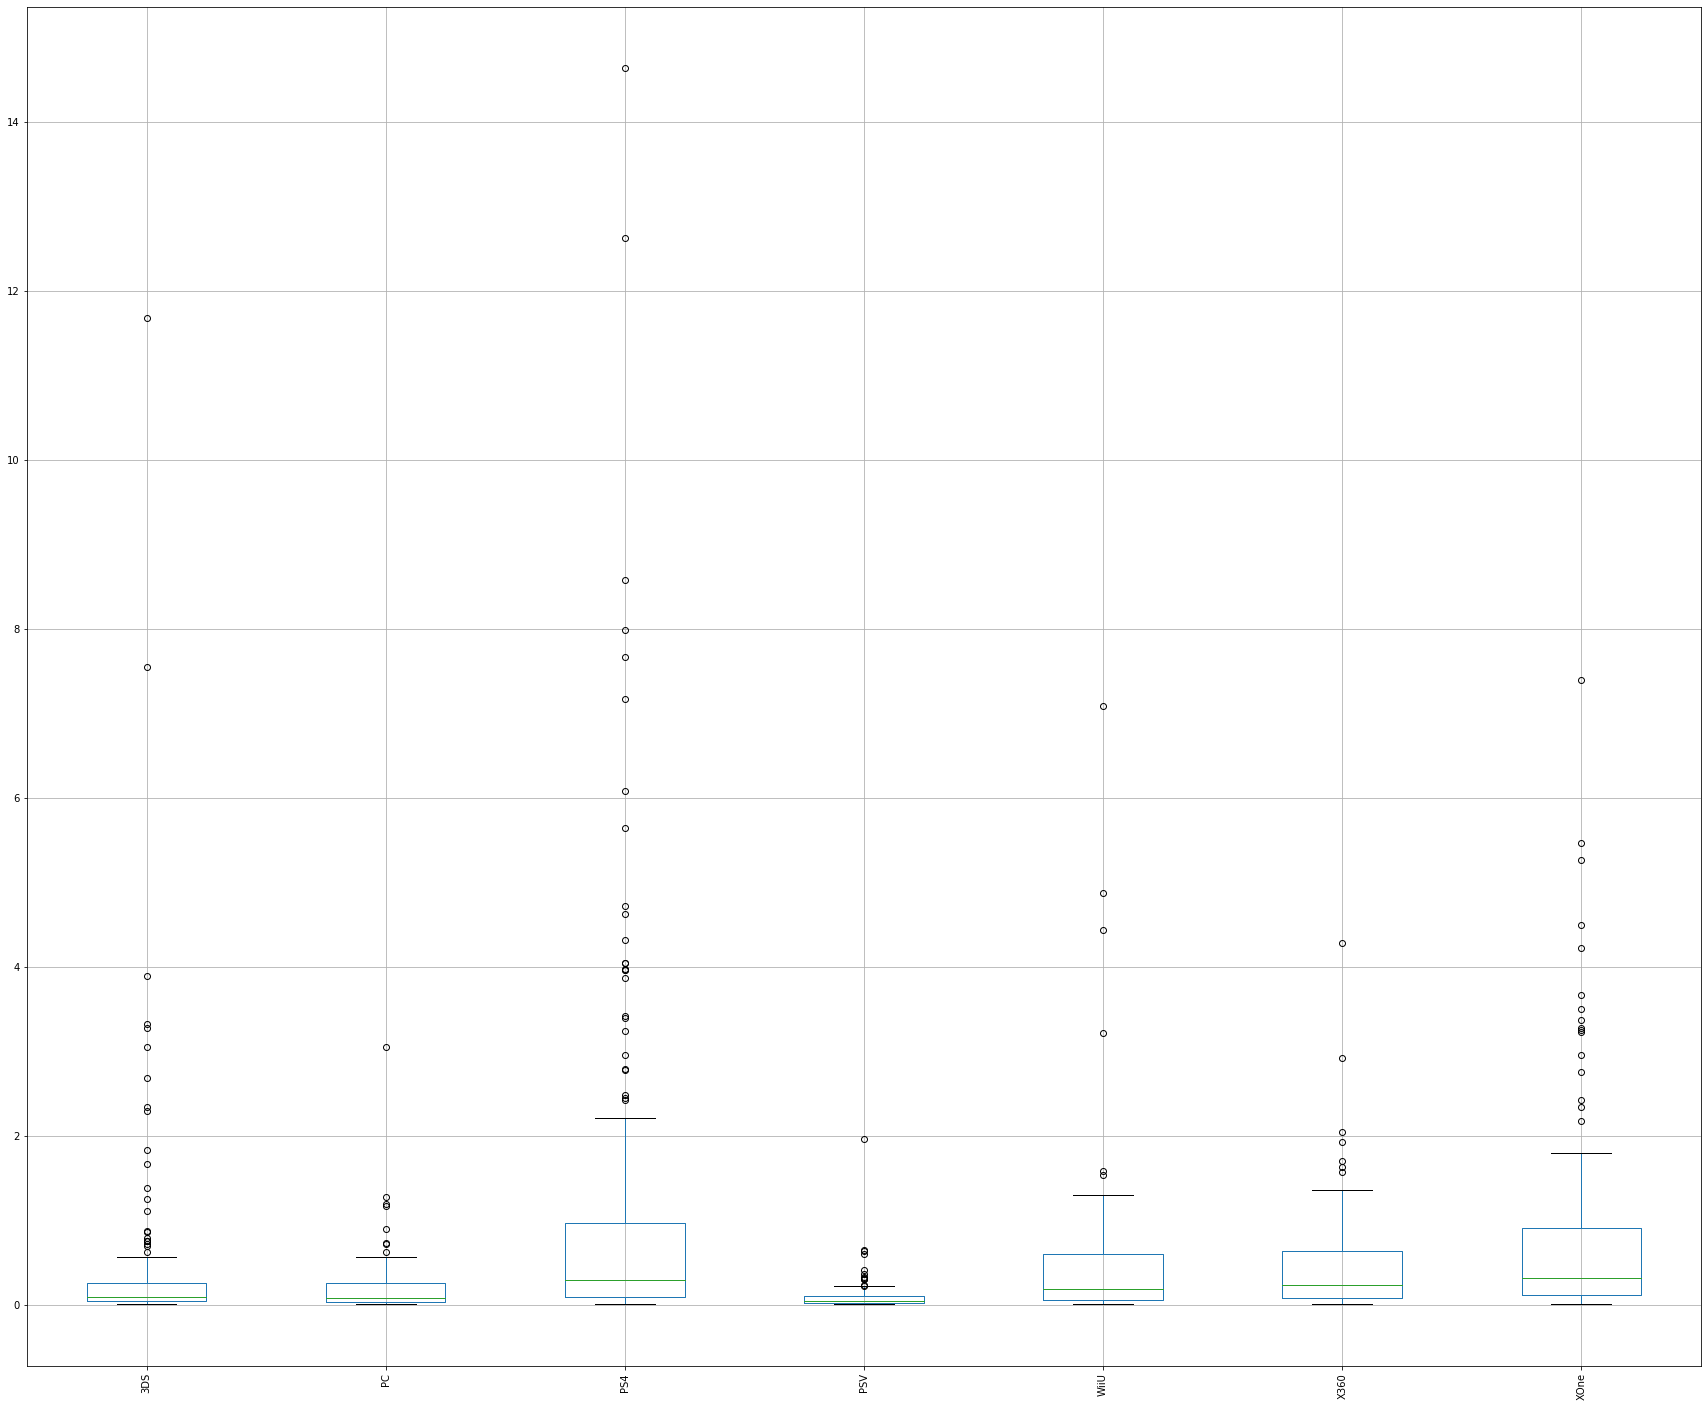

In [21]:
#Отберем данные по перспективным платформам
glob_boxsale = df.query("platform in ['PS4', 'PC', 'XOne', 'WiiU', 'PSV', '3DS', 'X360']")

#Составим сводную таблицу
glob_boxsale= pd.pivot_table(
    glob_boxsale, 
    index='name',
    columns='platform', 
    values='total_sales', 
    aggfunc='sum')

#Построим ящик с усами
glob_boxsale.boxplot(rot=90, figsize=(30,25))

**Диаграмма размаха показывает, что у большинства платформ есть особо успешные игры - большое количество выбросов выше верхнего уса.**

Text(0.5, 1.0, 'Mean_sales_per_game')

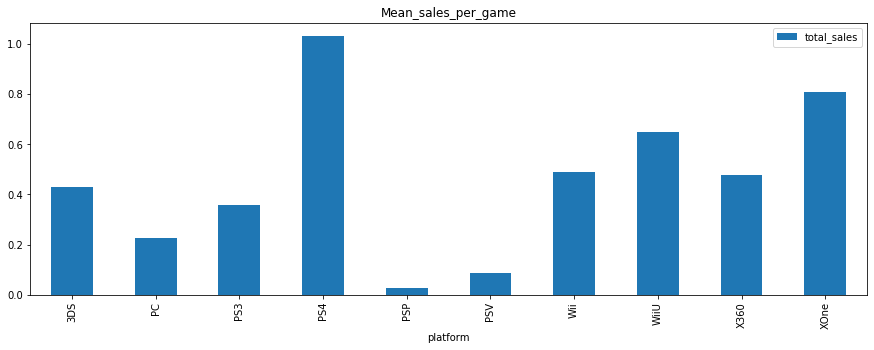

In [22]:
import matplotlib.pyplot as plt

sale_b = pd.pivot_table(df, index='platform', values='total_sales', aggfunc='mean')

sale_b.plot(kind='bar', figsize=(15,5))

plt.title("Mean_sales_per_game")

In [23]:
print(glob_boxsale.describe())

platform         3DS         PC         PS4         PSV       WiiU       X360  \

count     166.000000  97.000000  212.000000  210.000000  59.000000  98.000000   

mean        0.430964   0.224742    1.032547    0.086429   0.650508   0.476531   

std         1.223959   0.391690    1.935690    0.162925   1.275634   0.657035   

min         0.010000   0.010000    0.010000    0.010000   0.010000   0.010000   

25%         0.040000   0.030000    0.090000    0.020000   0.055000   0.080000   

50%         0.090000   0.080000    0.290000    0.040000   0.190000   0.230000   

75%         0.257500   0.260000    0.972500    0.100000   0.605000   0.632500   

max        11.680000   3.050000   14.630000    1.960000   7.090000   4.280000   



platform        XOne  

count     141.000000  

mean        0.810000  

std         1.220984  

min         0.010000  

25%         0.110000  

50%         0.320000  

75%         0.910000  

max         7.390000  


**Наиболее успешными платформами с точки зрения средних продаж яляются PS4, XOne и WiiU.**

- *Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.*

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


Для анализа выберем платформу PS4

In [25]:
PS4 = df[df['platform'] == "PS4"]

PS4.dropna(inplace=True)

PS4.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  This is separate from the ipykernel package so we can avoid doing imports until


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2014.613636,0.426439,0.555909,0.044318,0.191288,72.939394,6.796212,1.217955
std,0.488770,0.669782,1.009090,0.071186,0.301012,12.167883,1.309356,1.909711
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.020000
25%,2014.000000,0.030000,0.047500,0.000000,0.010000,67.000000,6.200000,0.115000
50%,2015.000000,0.140000,0.155000,0.020000,0.070000,74.000000,7.100000,0.415000
75%,2015.000000,0.470000,0.645000,0.060000,0.260000,81.000000,7.700000,1.675000
max,2015.000000,3.960000,6.310000,0.490000,1.970000,97.000000,9.200000,12.620000


Стоит отметить, что судя по минимальным, максимальным, средним и медиане оценок критиков и игроков шкала оценки 10-бальная, шкала оценки критиков 100 бальная. Для простоты сравнения можно было бы разделить оценки критиков на 10 с отстатком, чтобы привести их к одной размерности и посмотреть как сходятся или расходятся оценки критиков и игроков.

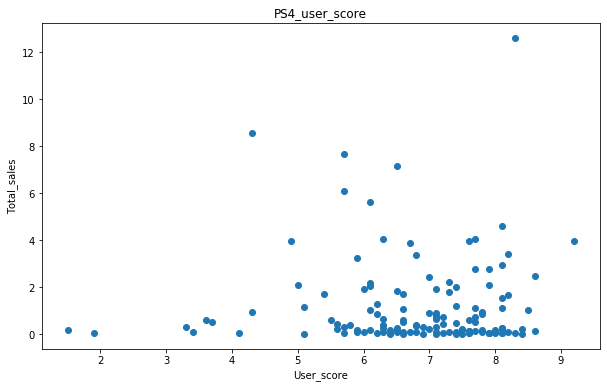

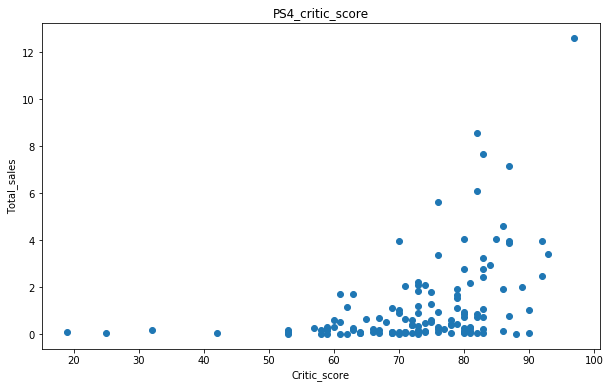

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = PS4['user_score'], y = PS4['total_sales'])
plt.xlabel("User_score")
plt.ylabel("Total_sales")
plt.title('PS4_user_score')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = PS4['critic_score'], y = PS4['total_sales'])
plt.xlabel("Critic_score")
plt.ylabel("Total_sales")
plt.title('PS4_critic_score')
plt.show()

In [27]:
PS4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.141111,-0.151346,0.046123,-0.156916,-0.046324,0.002467,-0.152476
na_sales,-0.141111,1.000000,0.730577,0.539824,0.924925,0.433804,0.035803,0.902671
eu_sales,-0.151346,0.730577,1.000000,0.550951,0.935218,0.359648,-0.033279,0.952578
jp_sales,0.046123,0.539824,0.550951,1.000000,0.587436,0.383929,0.248329,0.610320
other_sales,-0.156916,0.924925,0.935218,0.587436,1.000000,0.426064,0.002027,0.998081
critic_score,-0.046324,0.433804,0.359648,0.383929,0.426064,1.000000,0.613803,0.423652
user_score,0.002467,0.035803,-0.033279,0.248329,0.002027,0.613803,1.000000,0.004549
total_sales,-0.152476,0.902671,0.952578,0.610320,0.998081,0.423652,0.004549,1.000000



**Интерпретация значений коэффициента корреляции**

Значение    | Интерпретация
:-----------|:-----:
до 0,2      | Очень слабая
до 0,5      | Слабая
до 0,7      | Средняя
до 0,9      | Высокая
свыше 0,9   | Очень высокая корреляция

**На диаграммах рассеивания находится большое количество точек вблизи нуля продаж, независимо от пользовательского и экспертного рейтинга игр. В целом экспертная диаграмма напоминает сдвинутую пользовательскую диаграмму** 


**Найденные коэффициент корреляции между оценками критиков и суммарными продажами на платформе PS4 показывает , что между ними существует слабая положительная связь, т.е. при росте оценок растут продажи, но не столь сильно. Коээфициент равен: 0,4.**


**Коэффициент корреляции между оценками игроков и суммарными продажами на платформе PS4 показывает, что между ними существует очень слабая связь, т.е. при росте оценок игроков суммарные продажи изменяются очень слабо**

**Если корреляция продаж с отзывами критиков не вызывает у меня удивления, т.к. отзывы критиков зачастую бывают предвзятыми и часто являются составляющей PR-компании игры и нечестная положительная оценка критиков может кратковременно стимулировать продажи, то слабая отрицательная корреляция продаж с оценками игроков для меня неожиданна**

**Так можно сделать вывод, что коммерческий успех игры слабо зависит от оценок игроков и критиков** (начинаю подозревать ошибочность данных или мои возможные ошибки в их обработке, т.к. по-моему мнению положительные отзывы реальных игроков больше всего стимилуруют рост продаж)

*Для сравнения выясним коэффициенты корреляции продаж с оценками игроков и критиков на платфоме XOne*

In [28]:
XOne = df[df['platform'] == "XOne"]

XOne.dropna(inplace=True)

XOne.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  This is separate from the ipykernel package so we can avoid doing imports until


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2014.522222,0.596111,0.323778,0.002889,0.091333,74.455556,6.553333,1.014111
std,0.502304,0.745601,0.436438,0.007680,0.110201,12.333531,1.254762,1.207242
min,2014.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.100000,0.010000
25%,2014.000000,0.110000,0.052500,0.000000,0.020000,69.250000,5.800000,0.212500
50%,2015.000000,0.315000,0.160000,0.000000,0.050000,77.000000,6.800000,0.540000
75%,2015.000000,0.730000,0.377500,0.000000,0.120000,82.000000,7.475000,1.355000
max,2015.000000,3.220000,2.190000,0.040000,0.480000,97.000000,9.200000,5.470000


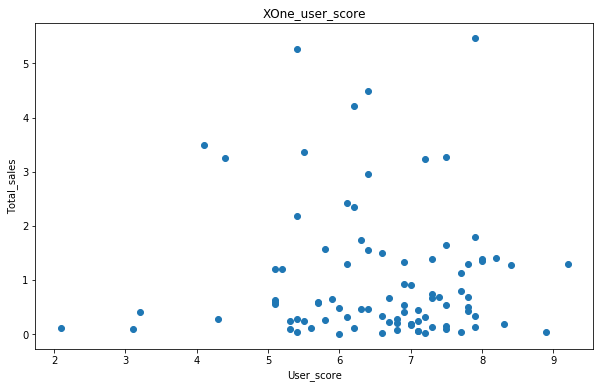

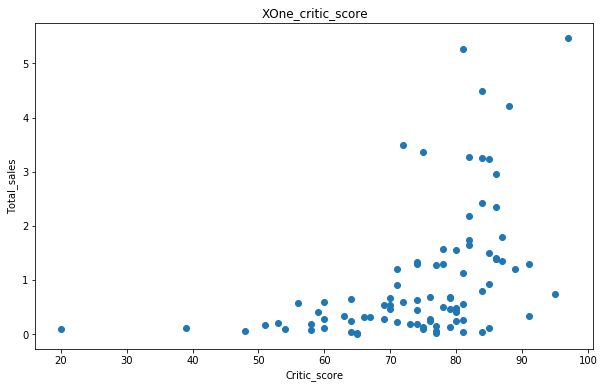

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = XOne['user_score'], y = XOne['total_sales'])
plt.xlabel("User_score")
plt.ylabel("Total_sales")
plt.title('XOne_user_score')
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = XOne['critic_score'], y = XOne['total_sales'])
plt.xlabel("Critic_score")
plt.ylabel("Total_sales")
plt.title('XOne_critic_score')
plt.show()


In [30]:
XOne.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.038018,-0.096743,-0.016829,-0.049257,0.013764,-0.110647,-0.063058
na_sales,-0.038018,1.000000,0.693591,0.393659,0.984082,0.427181,-0.041390,0.960686
eu_sales,-0.096743,0.693591,1.000000,0.407035,0.808508,0.419886,-0.026019,0.866275
jp_sales,-0.016829,0.393659,0.407035,1.000000,0.417592,0.256419,0.106264,0.434756
other_sales,-0.049257,0.984082,0.808508,0.417592,1.000000,0.454221,-0.041311,0.994004
critic_score,0.013764,0.427181,0.419886,0.256419,0.454221,1.000000,0.492556,0.458719
user_score,-0.110647,-0.041390,-0.026019,0.106264,-0.041311,0.492556,1.000000,-0.038064
total_sales,-0.063058,0.960686,0.866275,0.434756,0.994004,0.458719,-0.038064,1.000000


**Картина c коэффициентом корреляции и диаграммой рассеяния платформы XOne практически аналогична картине платформы PS4. Так по этим данным можно сделать вывод, что коммечерческий успех мало зависит от оценок игроков и критиков и нужно искать дополнительные критерии успешности игр, однако стоит заметить - у интервала с высокими оценками количество коммерчески успешных игр больше. Стоит отметить, что наблюдаеются аномалии - игры с относительно высоким пользовательским и экспертным рейтингами, но очень низкими продажами и наоборот**


- *Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

Для этого соберем сводную таблицу по жанрам, постороим график

In [31]:
genre_names = df['genre'].unique()
genre_names

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

,total_sales
genre,
Action,150.77
Shooter,120.57
Role-Playing,77.09
Sports,69.32
Misc,25.50
Racing,23.73
Fighting,21.01
Platform,14.21
Adventure,11.70


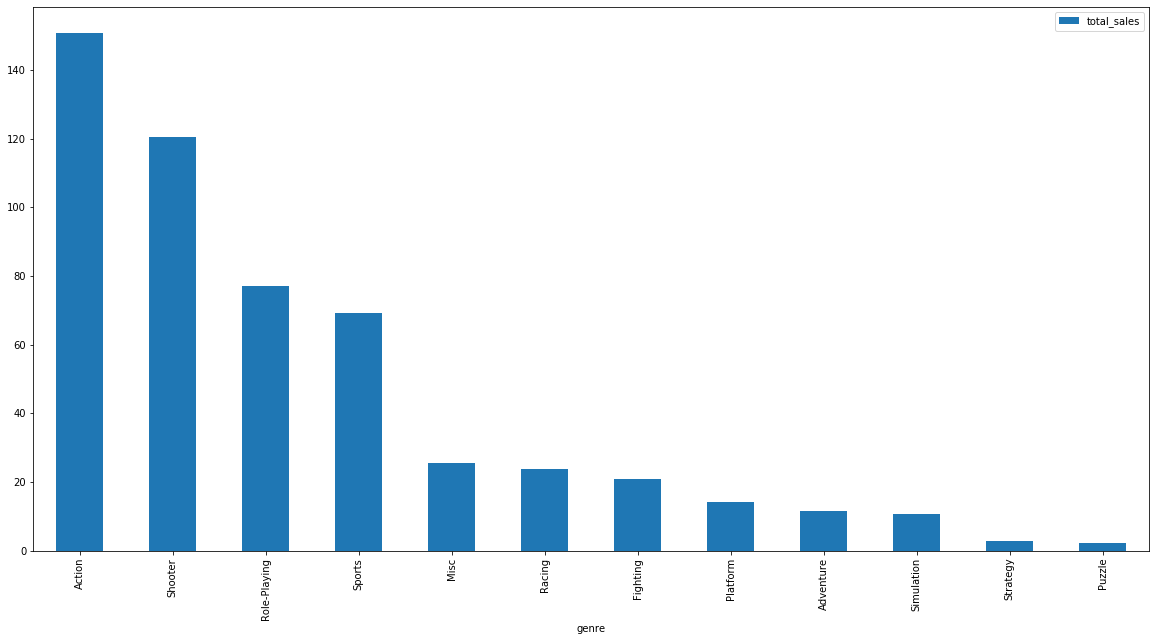

In [32]:
genre_sales = df.query("platform in ['PS4', 'PC', 'XOne', 'WiiU', 'PSV', '3DS', 'X360']")
genre_sales = pd.pivot_table(genre_sales, index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_sales.plot(kind='bar', figsize=(20,10))

genre_sales

**Топ 3 наиболее прибыльных жанров по валовым продажам являются Action, Shooter и  Role-Playing.**  
От себя хочу добавить, что некоторые современные игры можно отнести сразу к нескольким жанрам, т.к. они находятся на их стыке или имеют эдементы другого жанра. Успех игры одного жанра может зависить от оригинальной реализации в ней механик другого жанра.

Также мы проверим из какого количества игр складываются эти суммы продаж

In [33]:
gen_data = df.query("platform in ['PS4', 'PC', 'XOne', 'WiiU', 'PSV', '3DS', 'X360']")

print("Кол-во учтенных игр жанра Action: ", gen_data[gen_data['genre'] == 'Action'].shape[0])
print("Кол-во учтенных игр жанра Sports: ", gen_data[gen_data['genre'] == 'Shooter'].shape[0])
print("Кол-во учтенных игр жанра Role-Playing: ", gen_data[gen_data['genre'] == 'Role-Playing'].shape[0])

Кол-во учтенных игр жанра Action:  365

Кол-во учтенных игр жанра Sports:  68

Кол-во учтенных игр жанра Role-Playing:  144


На первый взгляд жанр Action самый прибыльный, однако, количество выпущенных игр данного жанра значительно больше остальных следовательно скорее всего такая сумма продаж связанна именно с количеством игр этого жанра, а не с его прибыльностью. Посмотрим среднюю прибыльность игр каждого жанра.

,total_sales
genre,
Shooter,1.773088
Sports,0.806047
Fighting,0.724483
Platform,0.676667
Racing,0.641351
Role-Playing,0.535347
Simulation,0.452083
Action,0.413068
Misc,0.369565


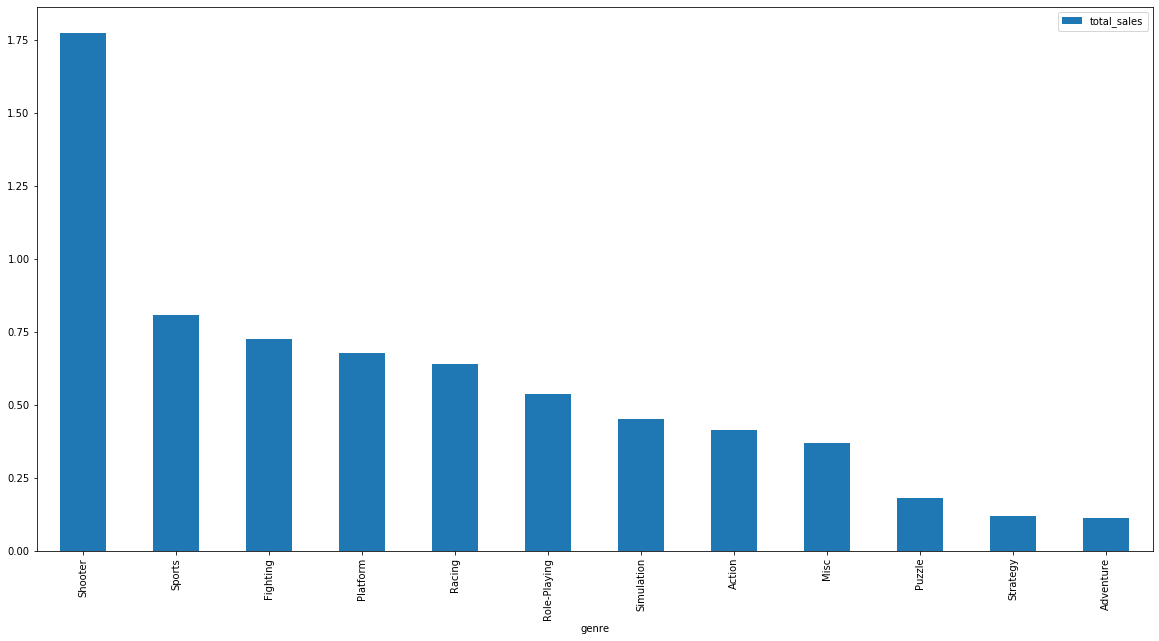

In [34]:
mean_genre_sales = pd.pivot_table(gen_data, index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)
mean_genre_sales.plot(kind='bar', figsize=(20,10))

mean_genre_sales

**Однако по средним продажам одной игры топ 3 жанров выглядит иначе чем по валовой прибыли - это Shooter =  1.773088; Sports = 0.806047; Fighting = 0.724483; В свою очередь жанры Action и  Role-Playing занимают 8-е и 6-е места соответственно**

***Выводы**<br><br> 
- Проведен исследовательский анализ данных.<br>
- Построен график выпуска игр по годам, в результате определены периоды различных состояний рынка (зарождение, рост, зрелость).
- Определен временно аткульный интервал для проведения анализа (2014 - 2015 гг.)
- Определен средний срок жизни платформы (10 лет)
- Определены наиболее перспективные в коммерческом плане платформы (PS4, PC, XOne, WiiU, PSV, 3DS, X360)
- Построен график "ящик с усами" и определны платформы с наибольшими средними продажами (PS4, XOne, WiiU)
- Обнаружены слабая положительная коррекляция между экспертным рейтингом игры и ее продажами, а также  очень слабая корреляция между пользовательским рейтингом игры и ее продажами для платформ PS4 и XOne
- Определены жаныр игр с наибольшими валовыми продажами (Action, Shooter, Role-Playing)
- Определены жанры игр с наибольшими средними продажами (Shooter, Sports, Fighting)


***Шаг 5. Составьте портрет пользователя каждого региона*** <br>
 - *Определите самые популярные платформы (топ-5) для каждого региона (NA, EU, JP). Опишите различия в долях продаж.*





Топ платформ по валовым продажам игр в стране: NA 




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


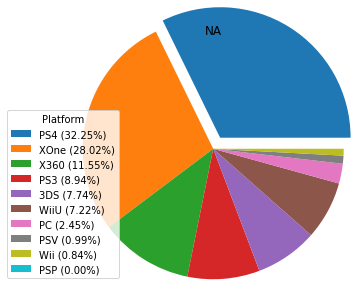





Топ-5 платформ по валовым продажам игр в стране: NA 



          na_sales  percent, %

platform                      

PS4          77.12   32.250240

XOne         67.00   28.018233

X360         27.61   11.546021

PS3          21.38    8.940744

3DS          18.50    7.736378





Топ платформ по валовым продажам игр в стране: EU 




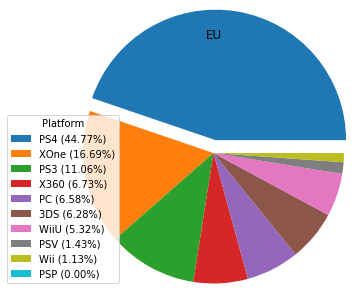





Топ-5 платформ по валовым продажам игр в стране: EU 



          eu_sales  percent, %

platform                      

PS4          98.26   44.773535

XOne         36.62   16.686412

PS3          24.28   11.063520

X360         14.78    6.734712

PC           14.44    6.579787





Топ платформ по валовым продажам игр в стране: JP 




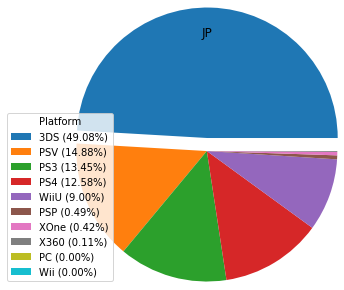





Топ-5 платформ по валовым продажам игр в стране: JP 



          jp_sales  percent, %

platform                      

3DS          36.21   49.078341

PSV          10.98   14.882082

PS3           9.92   13.445378

PS4           9.28   12.577934

WiiU          6.64    8.999729


In [35]:
import matplotlib.pyplot as plt

countries = ['na_sales', 'eu_sales', 'jp_sales']

for country in countries:
    print("\n\nТоп платформ по валовым продажам игр в стране:", country[:2].upper(), "\n")
    
    plot_data = pd.pivot_table(
        df, 
        index='platform', 
        values=country, 
        aggfunc='sum').sort_values(by=country, ascending=False)
    
    sum_sales = plot_data[country].sum()
    
    
    labels = [f"{n} ({v/sum_sales:.2%})" for n,v in zip(plot_data.index, plot_data[country])]
    plt.pie(plot_data, radius=1.5, explode=[0.15] + [0 for _ in range(len(plot_data.index) - 1)])
    
    plt.legend(
        bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25), 
        loc = 'best', 
        labels = labels,
        title='Platform') 
    
    
    
    plt.title(country[:2].upper())
    plt.show()
    print("\n\nТоп-5 платформ по валовым продажам игр в стране:", country[:2].upper(), "\n")
    plot_data['percent, %'] = (plot_data / sum_sales) * 100
    print(plot_data.head(5))



**Самыми популярными платформами (топ-5) в Северной Америке (NA) являются: PS4, XOne, X360, PS3, 3DS.**<br> 
**Самыми популярными платформами (топ-5) в Европе (EU) являются: PS4, XOne, PS3, X360, PC.**<br>
**Самыми популярными платформами (топ-5) в Японии (JP) являются: 3DS, PSV, PS3, PS4, WiiU.**<br>

<p>Отметим, что топ-5 платформ в Японии (JP) составляют японские приставки. В Европе (EU) топ-5 делять японские и американские платформы, замыкает его платформа PC Отметим, что на 1-м месте находится японская приставка PS4. В Северной Америке (NA) 1-е место занимает японская PS4, однако 2-е и 3-е за местными платформами. <br><br>Их интересных особенностей отметим наличие в топе-5 каждого региона устаревшей платформы PS3 и наличие в топе Северной Америки лидера японского рынка 3DS. Также можно сказать, что рынок Европы и Японии более монополизирован чем рынок Северной Америки, доли лидирующей платформы составляют 44.77% и  49.07% соответственно<br><br>

**Можно сказать, на основных платежеспособных рынках доминируют японские игровые приставки.**

- *Самые популярные жанры (топ-5) для каждого региона (NA, EU, JP). Поясните разницу.*





Топ жанров по валовым продажам игр в стране: NA 




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

  del sys.path[0]


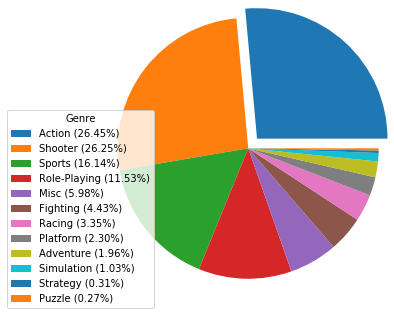





Топ-5 жанров по валовым продажам игр в стране: NA 



              na_sales  percent, %

genre                             

Action           63.24   26.445866

Shooter          62.78   26.253502

Sports           38.59   16.137666

Role-Playing     27.58   11.533476

Misc             14.29    5.975829





Топ жанров по валовым продажам игр в стране: EU 




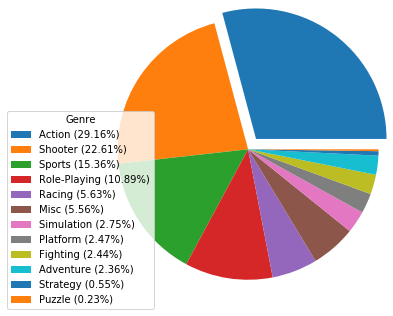





Топ-5 жанров по валовым продажам игр в стране: EU 



              eu_sales  percent, %

genre                             

Action           64.00   29.162490

Shooter          49.62   22.610043

Sports           33.72   15.364987

Role-Playing     23.89   10.885811

Racing           12.36    5.632006





Топ жанров по валовым продажам игр в стране: JP 




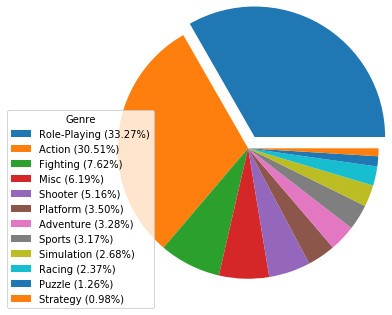





Топ-5 жанров по валовым продажам игр в стране: JP 



              jp_sales  percent, %

genre                             

Role-Playing     24.55   33.274600

Action           22.51   30.509623

Fighting          5.62    7.617240

Misc              4.57    6.194091

Shooter           3.81    5.164001


In [36]:
import matplotlib.pyplot as plt

countries = ['na_sales', 'eu_sales', 'jp_sales']

for country in countries:
    print("\n\nТоп жанров по валовым продажам игр в стране:", country[:2].upper(), "\n")
    plot_data = pd.pivot_table(df, index='genre', values=country, aggfunc='sum').sort_values(by=country, ascending=False)
    sum_sales = plot_data[country].sum()
    
    
    
    labels = [f"{n} ({v/sum_sales:.2%})" for n,v in zip(plot_data.index, plot_data[country])]
    plt.pie(plot_data, radius=1.5, explode=[0.15] + [0 for _ in range(len(plot_data.index) - 1)])
    
    plt.legend(
        bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25), 
        loc = 'best', 
        labels = labels,
        title='Genre') 
       
    plt.show()  
    print("\n\nТоп-5 жанров по валовым продажам игр в стране:", country[:2].upper(), "\n")
    plot_data['percent, %'] = (plot_data / sum_sales) * 100
    
    print(plot_data.head(5))

**Наиболее популярными жанрами в Северной Америке (NA) являются: Action, Shooter, Sports, Role-Playing и Misc** <br>
**Наиболее популярными жанрами в Европе (EU) являются: Action, Shooter, Sports, Role-Playing и Racing** <br>
**Наиболее популярными жанрами в Японии (JP) являются: Role-Playing, Action, Fighting, Misc и Shooter** <br>

**Доминирующие предпочтения игроков в Европе и Северной Америке одинаковы за исключеним закрывающей топ-5 позиции, в Северной Америке это Misc,а в Европе это Racing. Больше всего игроки из этих стран играют в Action, Shooter и Sports.**<br>

**В Японии наиболее предпочитаемый игроками жанр игр Role-Playing. Индивидуальной особенностью игроков этой страны является наличие в топе жанра Fighting (возможно это связано с японской культурой - восточные боевые искусства). В целом на жанровые предпочтения влияют менталитет и культура страны, так с учетом азиатской культуры и менталитета японцев домимирование Role-Playing выглядит органично.**<br>



 - *Влияет ли рейтинг ESRB на продажи в отдельном регионе (NA, EU, JP)?*

Перед началом анализа освежим значения аббревиатур рейтинга:

'E' - («Everyone») — «Для всех»<br>
 nan - пропуск данных <br>
'M' - («Mature») — «От 17 лет»<br>
'T' - («Teen») — «Подросткам 13—19 лет»<br>
'E10+' - («Everyone 10 and older») — «Для всех старше 10 лет»<br>
'AO' -(«Adults Only 18+») — «Только для взрослых»<br>
'EC' - («Early childhood») — «Для детей младшего возраста»<br>

Мы помним, что при предварительной подготовке у нас оказалось 6676 игр с неопределенным (пропущенным) возрастным рейтингом, присвоить им какой-то рейтинг заочно будет не корректно, т.к. на практике это могут быть игры с самымы различными рейтингами. Считаю, что для работы с ними необходимо провести дополнительную работу по устранению этого пробела в данных, а пока в рамках данного проекта ограничимся известными нам данными.  

In [37]:
#Выведем виды оставшихся рейтингов
print("Виды рейтинга ESRB:", df['rating'].unique())

#Выведем количество игр с пропущенным рейтингом
print("\nИгры с пропущенным рейтингом:", df['rating'].isnull().count(), "шт")

Виды рейтинга ESRB: [nan 'M' 'E' 'T' 'E10+']



Игры с пропущенным рейтингом: 1187 шт


Примечательно, что из рейтинга пропали игры 'AO' -(«Adults Only 18+»), напомню что мы анализируем игры с 2014 по 2015 год, возможны данные по играм с этими рейтингам кроются в значениях na и в играх рейтинг которых находился на стадии определения RP и был заменен на E, т.к. эти игры уже имели продажи, но не имели рейтинга, а значит продавались всем.





Возрастной рейтинг и продажи игр в стране: NA 




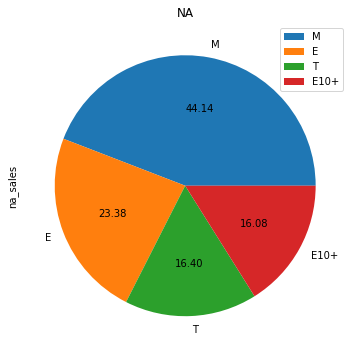





Возрастной рейтинг и продажи игр в стране: NA 



        na_sales  percent, %

rating                      

M          80.75   44.140155

E          42.77   23.379250

T          30.00   16.398819

E10+       29.42   16.081775





Возрастной рейтинг и продажи игр в стране: EU 




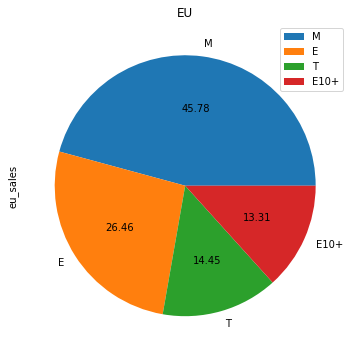





Возрастной рейтинг и продажи игр в стране: EU 



        eu_sales  percent, %

rating                      

M          76.90   45.779259

E          44.45   26.461484

T          24.28   14.454102

E10+       22.35   13.305155





Возрастной рейтинг и продажи игр в стране: JP 




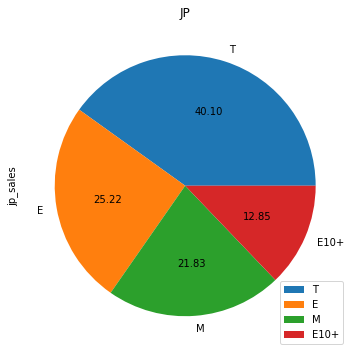





Возрастной рейтинг и продажи игр в стране: JP 



        jp_sales  percent, %

rating                      

T          12.51   40.096154

E           7.87   25.224359

M           6.81   21.826923

E10+        4.01   12.852564


In [38]:
import matplotlib.pyplot as plt

countries = ['na_sales', 'eu_sales', 'jp_sales']

for country in countries:
    print("\n\nВозрастной рейтинг и продажи игр в стране:", country[:2].upper(), "\n")
    
    plot_data = pd.pivot_table(df, index='rating', values=country, aggfunc='sum').sort_values(by=country, ascending=False)
    sum_sales = plot_data[country].sum()
    plot_data.plot(kind='pie', figsize=(6,6), subplots=True, autopct="%.2f")
    plt.title(country[:2].upper())
    plt.show()
    
    print("\n\nВозрастной рейтинг и продажи игр в стране:", country[:2].upper(), "\n")
    plot_data['percent, %'] = (plot_data / sum_sales) * 100
    print(plot_data.head(6))

Данные показывают, что в Европе (EU) и Северной Америке (NA) наибольший объем рынка занимают игры для взрослой аудитории (M), игры для всех (E) и подростковой частей (T) населения. Это соответствует ожиданиям, т.к. имено данные группы населения имеют наибольшее количество свободных денег для покупки, интерес к данному времяпроводжению. Игры с низким возрастным рейтингом в данных странах  имеют около 15% рынка. В целом по данному критерию рынок Европы комплиментарен рынку Северной Америки.<br><br>

Отличительной особенностью японского рынка является преобладание игр с рейтигом - T («Teen»), рейтинги Е и М занимают 2-е и 3-е места соответственно.<br><br>

Отметим, что одна и таже игра может (при отсутствии адаптации) может иметь разный возрастной рейтиг в разных странах.

**Выводы**
- Самымые популярные платформамы (топ-5) в Северной Америке (NA): PS4, XOne, X360, PS3, 3DS<br> 
- Самымые популярные платформамы (топ-5) в Европе (EU): PS4, XOne, PS3, X360, PC.*<br>
- Самымые популярные платформамы (топ-5) в Японии (JP): 3DS, PSV, PS3, PS4, WiiU<br><br>
    **Японские и американские платформы абсолютные мировые лидеры отрасли. В топе каждого региона присутствуют устаревшие, но все еще популярные платформы** <br><br>

- Самымые популярные жанры в Северной Америке (NA): Action, Shooter, Sports, Role-Playing и Misc <br>
- Самымые популярные жанры в Европе (EU): Action, Shooter, Sports, Role-Playing и Racing <br>
- Самымые популярные жанры в Японии (JP): Role-Playing, Action, Fighting, Misc и Shooter <br><br>
    **Три наиболее популярных жанра в Европе и Америке - Action, Shooter и Sports. Оличительной особенностью японских геймеров является любовь к Role-Playing**<br><br>
    **Наибольший объем рынка Европы и Северной Америки занимают игры для взрослой аудитории - M («Mature»). В Японии наибольшая доля рынка принадлежит игрым с рейтингом - T («Teen»).**

***Шаг 6. Проведите исследование статистических показателей*** <br>
-*Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения*

Получим сводные таблицы средних пользовательских и экпертных оценок для различных жанров игр, а также приведем оценку критиков из 100 бальной к 10-ти бальной. Построим совмещенную диаграмму средних пользовательских и экпертных оценок для различных жанров игр.

In [39]:
user_data_rating = pd.pivot_table(df, index='genre', values='user_score', aggfunc='mean')
critic_data_rating = pd.pivot_table(df, index='genre', values='critic_score', aggfunc='mean')
critic_data_rating['critic_score'] = critic_data_rating['critic_score'] / 10
df['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

Text(0, 0.5, 'score')

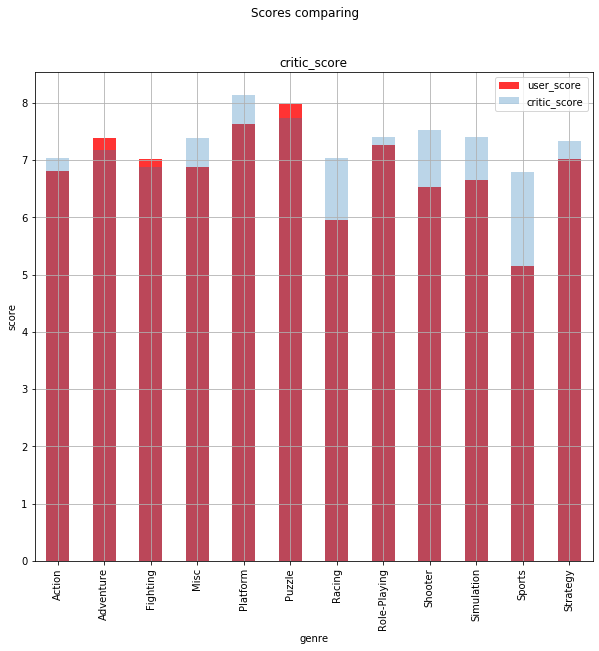

In [40]:
import matplotlib.pyplot as plt

ax = user_data_rating.plot(
    kind='bar', 
    figsize=(10,9), 
    subplots=True,
    grid=True,
    alpha=0.8,
    legend=True,
    title='Scores comparing',
    color='r',
    )

critic_data_rating.plot(
    kind='bar', 
    figsize=(10,9), 
    subplots=True,
    grid=True,
    alpha=0.3,
    ax=ax,
    )
plt.ylabel("score")

Средние пользовательские оценки для жанров: Action, Adventure, Fighting, Platform, Puzzle, Role-Playing и Simulation выше чем оценки критиков. В свою очеред средние оценки критиков для жанров: Sports, Racing, Shooter, Misc и Strategy выше средних пользовательских оценок.

Выведем средние пользовательские и экспертные оценки игр различных жанров

In [41]:
print(user_data_rating)
print("\n\n", critic_data_rating)

              user_score

genre                   

Action          6.809434

Adventure       7.382143

Fighting        7.025926

Misc            6.874286

Platform        7.631579

Puzzle          7.975000

Racing          5.944118

Role-Playing    7.257831

Shooter         6.527143

Simulation      6.650000

Sports          5.140000

Strategy        7.010000





               critic_score

genre                     

Action            7.036420

Adventure         7.170588

Fighting          6.876190

Misc              7.381481

Platform          8.137500

Puzzle            7.725000

Racing            7.028125

Role-Playing      7.403947

Shooter           7.523529

Simulation        7.408333

Sports            6.798276

Strategy          7.330000


Наибольшая средняя оценка пользователей принадлежит жанру Puzzle.<br>
Наибольшая средняя оценка критиков принадлежит жанру Platform.<br>

Построим для пользовательских и экспертных оценок графики распределения вероятностей, а также определим следующие параметры:
- Минимальная оценка игры данного жанра<br>
- Максимальная оценка игры данного жанра<br>
- Средняя оценка игры данного жанра<br>
- Дисперсия оценки игр данного жанра<br>
- Стандартное оклонение для игр данного жанра

Данные по пользовательским оценкам игр жанра: Shooter

Минимальная оценка игры данного жанра: 3.8

Максимальная оценка игры данного жанра: 8.5

Средняя оценка игры данного жанра: 6.654901960784313

Дисперсия оценки игр данного жанра: 1.3889254901960784

Стандартное оклонение для игр данного жанра: 1.1785268304947827 





Данные по пользовательским оценкам игр жанра: Action

Минимальная оценка игры данного жанра: 2.4

Максимальная оценка игры данного жанра: 9.0

Средняя оценка игры данного жанра: 6.90253164556962

Дисперсия оценки игр данного жанра: 1.6156623397565106

Стандартное оклонение для игр данного жанра: 1.2710870700925687 





Данные по пользовательским оценкам игр жанра: Role-Playing

Минимальная оценка игры данного жанра: 1.4

Максимальная оценка игры данного жанра: 9.3

Средняя оценка игры данного жанра: 7.251315789473683

Дисперсия оценки игр данного жанра: 2.0195982456140342

Стандартное оклонение для игр данного жанра: 1.4211256966271613 





Данные по пользовательски

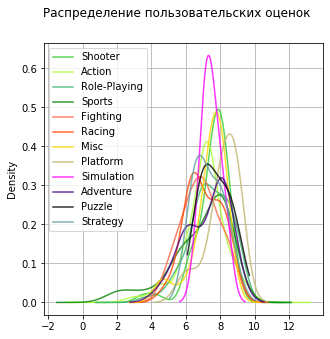

In [42]:
import numpy as np

genre_list = df['genre'].unique() #Создадим список жанров

temp_data = df.dropna(subset=['user_score'])   #Создадим сет в котором удалим игры без оценок юзеров
temp_data = temp_data.query('user_score > 0')  #Удалим из сета игры с нулевым рейтингом
temp_data = temp_data.dropna(subset=['critic_score']) #Удалим из сета игры без оценок критиков
temp_data = temp_data.query('critic_score > 0')
temp_data['critic_score'] = temp_data['critic_score'] / 10


dye = ['#32CD32', 
       '#ADFF2F', 
       '#3CB371', 
       '#008000', 
       '#FF6347', 
       '#FF4500', 
       '#FFD700', 
       '#BDB76B', 
       '#FF00FF', 
       '#4B0082', 
       '#000000',
       '#5F9EA0']

i = -1;

for genre in genre_list:  #Циклом пройдемся по каждому жанру
    data = temp_data[temp_data['genre'] == genre] 
    i += 1
    print("Данные по пользовательским оценкам игр жанра:", genre)
    print("Минимальная оценка игры данного жанра:", data['user_score'].min())
    print("Максимальная оценка игры данного жанра:", data['user_score'].max())
    print("Средняя оценка игры данного жанра:", data['user_score'].mean())
    print("Дисперсия оценки игр данного жанра:", np.var(data['user_score'], ddof=1))
    print("Стандартное оклонение для игр данного жанра:", np.std(data['user_score'], ddof=1), "\n\n")
    ax = data['critic_score'].plot(
    kind='kde', 
    figsize=(5,5), 
    subplots=True,
    grid=True,
    alpha=0.8,
    legend=True,
    title='Распределение пользовательских оценок ',
    color=dye[i],
    label=genre
    )


**Распределения вероятностей пользовательских оценок игр имеет вид нормального распределения (Распределения Гаусса)**

Данные по экспертным оценкам игр жанра: Shooter

Минимальная оценка игры данного жанра: 3.5

Максимальная оценка игры данного жанра: 8.9

Средняя оценка игры данного жанра: 7.523529411764707

Дисперсия оценки игр данного жанра: 1.015835294117647

Стандартное оклонение для игр данного жанра: 1.007886548237274 





Данные по экспертным оценкам игр жанра: Action

Минимальная оценка игры данного жанра: 2.6

Максимальная оценка игры данного жанра: 9.7

Средняя оценка игры данного жанра: 7.067721518987342

Дисперсия оценки игр данного жанра: 1.51863299201806

Стандартное оклонение для игр данного жанра: 1.2323282809454874 





Данные по экспертным оценкам игр жанра: Role-Playing

Минимальная оценка игры данного жанра: 3.6

Максимальная оценка игры данного жанра: 9.3

Средняя оценка игры данного жанра: 7.403947368421055

Дисперсия оценки игр данного жанра: 1.4201175438596492

Стандартное оклонение для игр данного жанра: 1.1916868480685894 





Данные по экспертным оценкам игр жанра: Sports

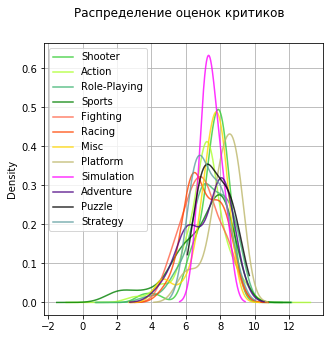

In [43]:
import numpy as np

dye = ['#32CD32', 
       '#ADFF2F', 
       '#3CB371', 
       '#008000', 
       '#FF6347', 
       '#FF4500', 
       '#FFD700', 
       '#BDB76B', 
       '#FF00FF', 
       '#4B0082', 
       '#000000',
       '#5F9EA0']

i = -1;
       
for genre in genre_list:  #Циклом пройдемся по каждому жанру
    data = temp_data[temp_data['genre'] == genre] 
    i += 1
    print("Данные по экспертным оценкам игр жанра:", genre)
    print("Минимальная оценка игры данного жанра:", data['critic_score'].min())
    print("Максимальная оценка игры данного жанра:", data['critic_score'].max())
    print("Средняя оценка игры данного жанра:", data['critic_score'].mean())
    print("Дисперсия оценки игр данного жанра:", np.var(data['critic_score'], ddof=1))
    print("Стандартное оклонение для игр данного жанра:", np.std(data['critic_score'], ddof=1), "\n\n")
    ax = data['critic_score'].plot(
    kind='kde', 
    figsize=(5,5), 
    subplots=True,
    grid=True,
    alpha=0.8,
    legend=True,
    title='Распределение оценок критиков',
    color=dye[i],
    label=genre
    )





**Распределения вероятностей экспертных оценок игр имеет вид нормального распределения (Распределения Гаусса)**

**Вывод:**
- Распределения вероятностей пользовательских и экспертных оценок игр по жанрам имеет вид нормального распределения (Распределения Гаусса). Для каждого жанра игр определены параметры описывающие распределение (стандартное отклонение и дисперсия).  

***Шаг 7. Проверьте гипотезы*** <br>
1. *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*<br>
2. *Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.*<br>
<br>Задайте самостоятельно пороговое значение alpha.<br>
<br>Поясните:<br>
-*Как вы сформулировали нулевую и альтернативную гипотезы;*<br>
-*Какой критерий применили для проверки гипотез и почему.*

Задача №1<br>
**Нулевая гипотеза** - *Средние пользовательские рейтинги платформ Xbox One и PC равны между собой;*<br>
**Альтернативная гипотеза** - *Средние пользовательские рейтинги платформ Xbox One и PC не равны между собой;*<br>

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод<br>scipy.stats.ttest_ind (array1, array2, equal_var)

In [44]:
temp_data['platform'].unique()

array(['PS4', 'WiiU', 'XOne', '3DS', 'PC', 'X360', 'PS3', 'PSV'],
      dtype=object)

In [45]:
from scipy import stats as st

data_xbox_one = pd.Series(temp_data[temp_data['platform']=='XOne']['user_score'])
data_pc = pd.Series(temp_data[temp_data['platform']=='PC']['user_score'])

alpha = 0.05  # критический уровень статистической значимости

# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data_xbox_one, data_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.31823214868306726

Не получилось отвергнуть нулевую гипотезу


С вероятностью ошибки в 5% мы можем отвергнуть Нулевую гипотезу, следовательно **средние пользовательские рейтинги платформ Xbox One и PC не равны между собой**<br>

Задача №2<br>
**Нулевая гипотеза** - *Средние пользовательские рейтинги жанров Action и Sports не равны.*<br>
**Альтернативная гипотеза** - *Средние пользовательские рейтинги жанров Action и Sports равны между собой;*<br>

In [46]:
temp_data['genre'].unique()

array(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing',
       'Platform', 'Simulation', 'Fighting', 'Adventure', 'Misc',
       'Puzzle', 'Strategy'], dtype=object)

In [47]:
data_action = pd.Series(temp_data[temp_data['genre']=='Action']['user_score'])
data_sports = pd.Series(temp_data[temp_data['genre']=='Sports']['user_score'])

alpha = 0.05  # критический уровень статистической значимости

# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data_action, data_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Не получилось отвергнуть нулевую гипоте')
else:
    print('Отвергаем нулевую гипотезу')

p-значение: 1.508056868427328e-10

Не получилось отвергнуть нулевую гипоте


С вероятностью ошибки в 5% мы отвергаем Нулевую гипотезу, следовательно **Средние пользовательские рейтинги жанров Action и Sports не равны между собой**<br>

•	*Как вы сформулировали нулевую и альтернативную гипотезы;* <br><br>
Нулевая и альтернативная гипотезы сформулированы по примеру из обучающего курса: за нулевую гипотезу принимается то, что мы хотим проверить, за альтернативную гипотезу противоположное ей суждение.<br><br>
•	*Какой критерий применили для проверки гипотез и почему.*<br><br>
За критерий проверки гипотезы принят **Уровень значимости – это пороговая (критическая) вероятность ошибки 1-го рода, т.е. непринятия гипотезы , когда она верна («ложная тревога»). Для наших целей Уровень значимости в обоих случаях принят в 5%**.

***Шаг 8. Напишите общий вывод***<br>

**В зависимости от выбранного Вами региона коммерческой деятельности для продвижения (или создания новой) игры имеет смысл выбрать одну из наиболее популярных платформ в этом регионе (топ-5):**<br> 
- **В Северной Америке (NA): PS4, XOne, X360, PS3, 3DS.**<br>
- **В Европе (EU): PS4, XOne, PS3, X360, PC.**<br>
- **В Японии (JP ): 3DS, PSV, PS3, PS4, WiiU.**<br>

**Наиболее перспектиными платформами для работы с ориентации на несколько рынков являются: PS4, 3DS, PS3 и XOne.**

**Предпочтительный возрастной рейтинг игры:<br>**
- **Рекомендуется выбрать одну из трех категорий в последовательности предпочтительности М, Е, Т  для рынков Европы (EU) и Северной Америки (NA).**<br>
- **Для рынка Японии (JP) в последовательности предпочтительности T, E, M.**

**Предпочтительный жанр также зависит от региона:**<br>
- **В Северной Америке (NA): Action, Shooter, Sports, Role-Playing и Misc.** <br>
- **В Европе (EU): Action, Shooter, Sports, Role-Playing и Racing.** <br>
- **В Японии (JP): Role-Playing, Action, Fighting, Misc и Shooter.** <br><br>

**Результаты анализа позволяют выбрать как наиболее "надежный" вариант в виде лидеров платформ, жанров, возрастных рейтингов и оценок критиков, так и протестировать локальные рынки с учетом их особенностей (например, жанр Fighting для Японии или Racing для Европы).**<br><br>

**Определяющими успешность игры закономерностями стали исследуемые в нами в процессе анализа метрики: платформа выпуска, жанр, возрастной рейтин, оценки, критиков, а также регион продаж.**

